<a href="https://colab.research.google.com/github/Nicoov21/data-mining/blob/main/5-Talleres/Taller-N4/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Exploración y detección de nulos, vacíos y duplicados

1. Carga el dataset sintético generado dentro del notebook y observa su estructura
con `.head()` y `.info()`

In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/CSV/datasetFutbolSucio.csv")

In [2]:
df.head()

Player_ID        Name             Team    Position   Age  Height_cm  \
0     P0810  Player_810         Juventus  Midfielder  24.0        202   
1     P0249  Player_249  Manchester City     Forward  37.0        178   
2     P0328  Player_328              PSG     Forward   NaN        171   
3     P0113  Player_113              NaN  Goalkeeper  34.0        204   
4     P0788  Player_788     FC Barcelona  Midfielder  27.0        187   

   Weight_kg  Matches_Played  Minutes_Played  Trophies_Won  ...  \
0         83             NaN       28.815126     64.271787  ...   
1         73       35.016034       48.905555     57.134683  ...   
2         68       52.737236       41.211766      6.057390  ...   
3         79       34.795245       68.569903     70.738047  ...   
4         66             NaN       29.084979     62.718647  ...   

   Stamina_Level  Injury_Proneness  Days_Injured_Season  Player_Rating_Avg  \
0      42.578484         30.548866            70.215676          62.427319   
1      10.541573         54.198714            10.526612          74.319743   
2      73.594831         66.957756            16.063418          59.382966   
3      43.190451         18.195010            22.270559          76.718002   
4      25.849625         11.086790            70.042795          65.174800   

   Man_of_the_Match_Awards  Discipline_Points  Possession_Lost  \
0                 8.380335          70.942285        57.830928   
1                31.043831          70.886632        70.836407   
2                78.974550          33.106315        13.992884   
3                12.350124          36.263320        66.303559   
4                57.384485          14.327249         9.114842   

   Ball_Control_Rating    Agility   Strength  
0            56.497303  42.362046  49.290009  
1            29.958475  53.011536  30.597835  
2            10.547988  39.922905  75.549270  
3             5.209080   7.117901        NaN  
4            33.596638  51.605292        NaN  

[5 rows x 100 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 100 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Player_ID                     1000 non-null   object 
 1   Name                          1000 non-null   object 
 2   Team                          791 non-null    object 
 3   Position                      803 non-null    object 
 4   Age                           768 non-null    float64
 5   Height_cm                     1000 non-null   int64  
 6   Weight_kg                     1000 non-null   int64  
 7   Matches_Played                804 non-null    float64
 8   Minutes_Played                1000 non-null   float64
 9   Trophies_Won                  1000 non-null   float64
 10  Market_Value_Euros            1000 non-null   float64
 11  Weekly_Wage_Euros             1000 non-null   float64
 12  Goals                         1000 non-null   float64
 13  Ass

In [4]:
df.shape

(1000, 100)

2. Cuenta los valores nulos en cada columna con `df.isna().sum()`.

In [5]:
df.isna().sum().sort_values(ascending=False)

Strength                   241
Age                        232
Shots                      220
Ground_Duels_Lost          214
Team                       209
                          ... 
Player_Rating_Avg            0
Discipline_Points            0
Man_of_the_Match_Awards      0
Ball_Control_Rating          0
Possession_Lost              0
Length: 100, dtype: int64

3. Identifica filas duplicadas con `df.duplicated().sum()` y reflexiona si deberían
eliminarse.

In [6]:
df.duplicated().sum()
#En este caso, con un número pequeño de duplicados,
# no encuentro que sea factible eliminar los duplicados,
# ya que no creo que se vea tan afectado el dataset con estos datos,
# además que mientras más datos tengamos, mejor será el entrenamiento y testeo del modelo.

np.int64(0)

4. Ejercicio: crea una función que muestre el porcentaje de valores faltantes por
columna.

In [7]:
def porcNulos(dataset):
  columnas = dataset.columns.tolist()
  poct = dataset[columnas].isna().mean() * 100
  return poct.sort_values(ascending=False)

In [8]:
x = porcNulos(df)
x

Strength                   24.1
Age                        23.2
Shots                      22.0
Ground_Duels_Lost          21.4
Team                       20.9
                           ... 
Player_Rating_Avg           0.0
Discipline_Points           0.0
Man_of_the_Match_Awards     0.0
Ball_Control_Rating         0.0
Possession_Lost             0.0
Length: 100, dtype: float64

# Limpieza y tratamiento de valores faltantes

In [9]:
dfOriginal = df.copy()

1. Decide cómo imputar valores nulos según el tipo de dato (media, mediana o
moda)

In [10]:
numCols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numCols:
    df[col].fillna(df[col].median(), inplace=True) #En caso de outliers mejor uso la mediana en vez de la media.

/tmp/ipython-input-3693786109.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True) #En caso de outliers mejor uso la mediana en vez de la media.


2. Reemplaza cadenas vacías ('') en columnas categóricas por NaN y luego
imputarlas con 'Desconocido'.

In [11]:
import numpy as np

catCols = df.select_dtypes(include=['object']).columns.tolist()
for col in catCols:
    df[col] = df[col].replace('', np.nan)

print(df[catCols].isna().sum().sort_values(ascending=False).head(10))

catCols = df.select_dtypes(include=['object']).columns.tolist()
for col in catCols:
    df[col].fillna('Desconocido', inplace=True)

print(df[catCols].isna().sum().sort_values(ascending=False).head(10))

Team         209
Position     197
Name           0
Player_ID      0
dtype: int64
Player_ID    0
Name         0
Team         0
Position     0
dtype: int64


/tmp/ipython-input-4027009309.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Desconocido', inplace=True)


3. Ejercicio: compara resultados antes y después de imputar con
`.describe(include='all')`.

In [12]:
print(f"Antes de imputar \n {dfOriginal.describe(include='all')}")
print(f"Después de imputar \n {df.describe(include='all')}")

Antes de imputar 
        Player_ID        Name             Team    Position         Age  \
count       1000        1000              791         803  768.000000   
unique       993         993                8           4         NaN   
top        P0568  Player_568  Manchester City  Midfielder         NaN   
freq           2           2              111         207         NaN   
mean         NaN         NaN              NaN         NaN   28.425781   
std          NaN         NaN              NaN         NaN    6.172210   
min          NaN         NaN              NaN         NaN   18.000000   
25%          NaN         NaN              NaN         NaN   23.000000   
50%          NaN         NaN              NaN         NaN   28.000000   
75%          NaN         NaN              NaN         NaN   34.000000   
max          NaN         NaN              NaN         NaN   39.000000   

          Height_cm    Weight_kg  Matches_Played  Minutes_Played  \
count   1000.000000  1000.000000    

# Detección y tratamiento de outliers

In [13]:
dfSinOutliers = df.copy()

1. Usa el método del rango intercuartílico (IQR) para detectar valores atípicos en
columnas numéricas.

In [14]:
numCols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numCols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} tiene {outliers.shape[0]} outliers.")

Age tiene 0 outliers.
Height_cm tiene 0 outliers.
Weight_kg tiene 0 outliers.
Matches_Played tiene 0 outliers.
Minutes_Played tiene 0 outliers.
Trophies_Won tiene 0 outliers.
Market_Value_Euros tiene 3 outliers.
Weekly_Wage_Euros tiene 0 outliers.
Goals tiene 0 outliers.
Assists tiene 1 outliers.
Shots tiene 6 outliers.
Shots_On_Target tiene 0 outliers.
Shot_Accuracy_Percent tiene 0 outliers.
Dribbles_Completed tiene 0 outliers.
Fouls_Won tiene 0 outliers.
Offsides tiene 0 outliers.
Penalties_Scored tiene 0 outliers.
Penalties_Missed tiene 0 outliers.
Expected_Goals_xG tiene 0 outliers.
Expected_Assists_xA tiene 1 outliers.
Non_Penalty_Goals tiene 0 outliers.
Crosses_Completed tiene 0 outliers.
Crosses_Attempted tiene 0 outliers.
Big_Chances_Created tiene 0 outliers.
Big_Chances_Missed tiene 0 outliers.
Touches_in_Box tiene 0 outliers.
Headed_Goals tiene 0 outliers.
Goals_Per_90 tiene 0 outliers.
Passes_Completed tiene 0 outliers.
Passes_Attempted tiene 3 outliers.
Pass_Accuracy_Percen

In [15]:
for col in numCols:
  Q1 = dfSinOutliers[col].quantile(0.25)
  Q3 = dfSinOutliers[col].quantile(0.75)
  IQR = Q3 - Q1
  dfSinOutliers = dfSinOutliers[(dfSinOutliers[col] >= Q1 - 1.5 * IQR) & (dfSinOutliers[col] <= Q3 + 1.5 * IQR)]

2. Grafica boxplots antes y después del tratamiento para observar los cambios.


Graficos boxplots antes del tratamiento


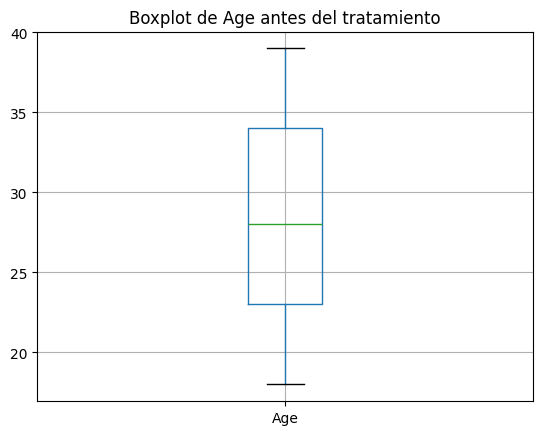

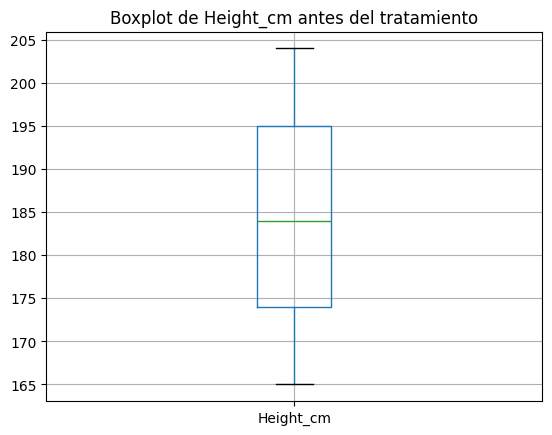

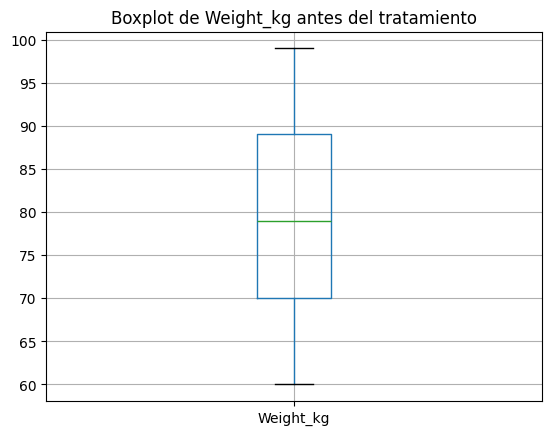

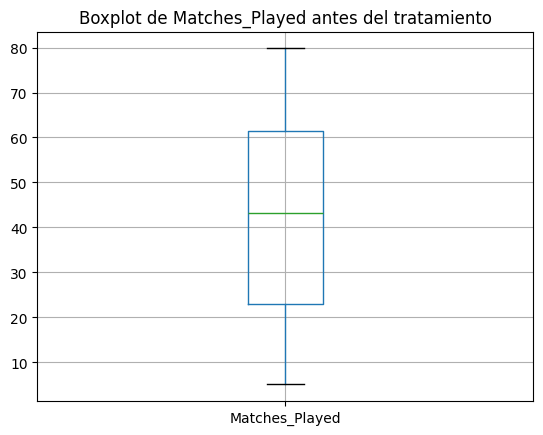

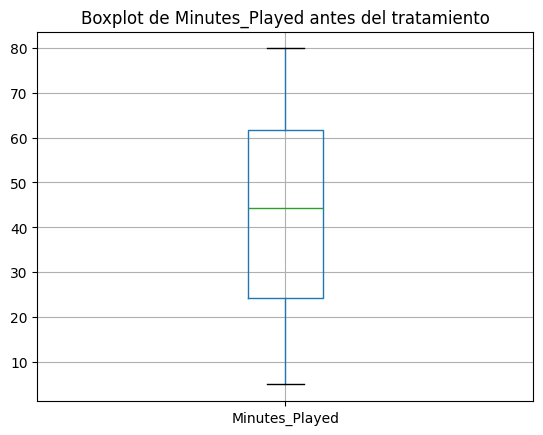

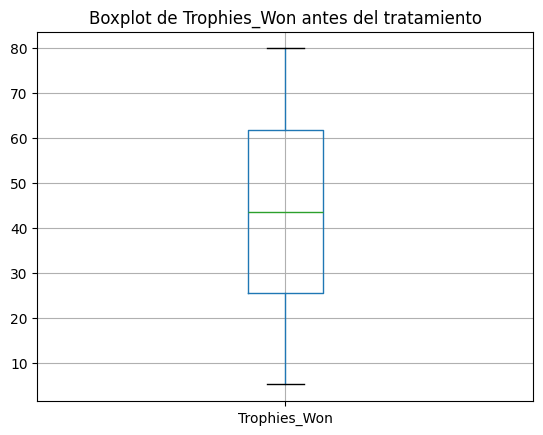

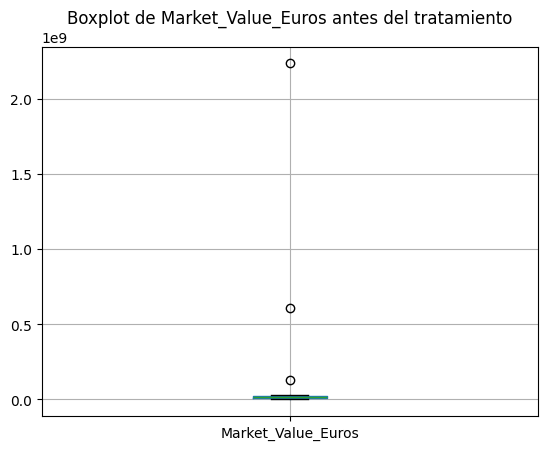

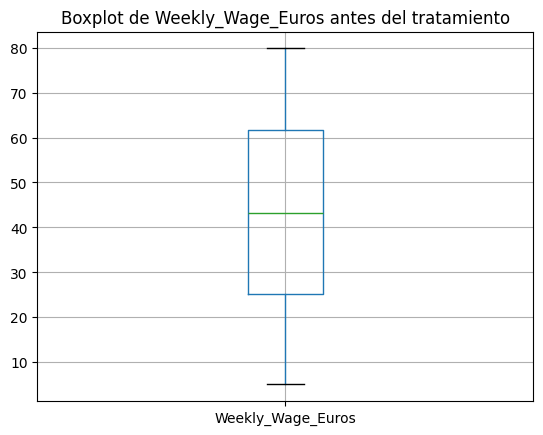

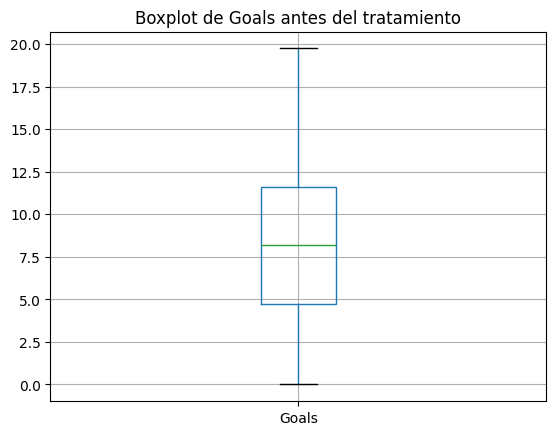

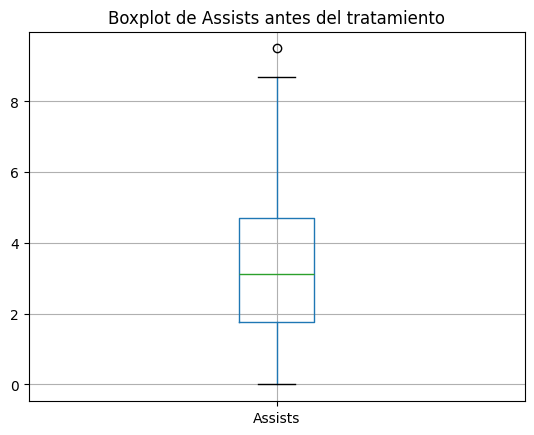

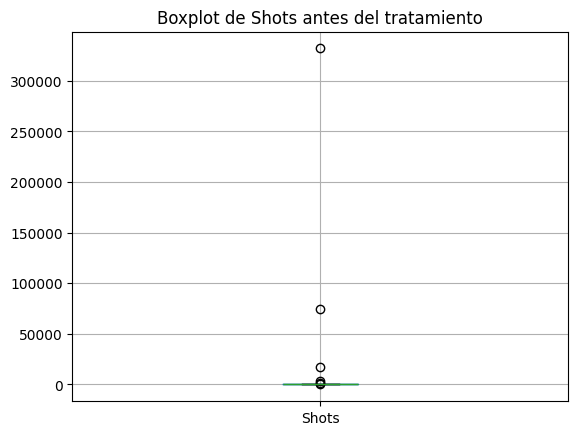

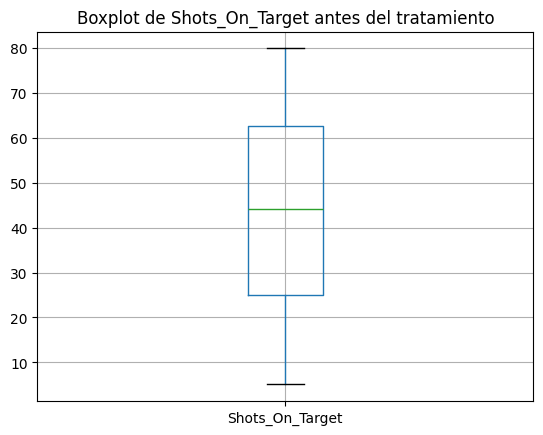

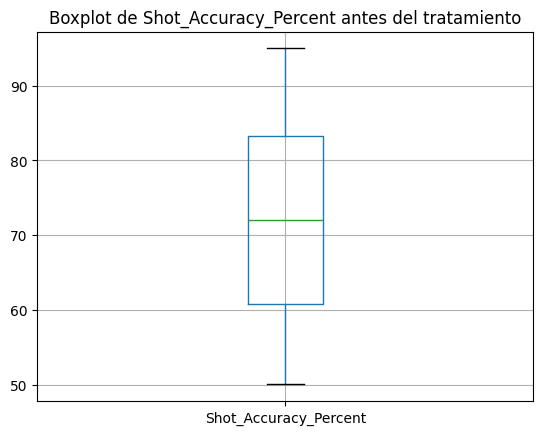

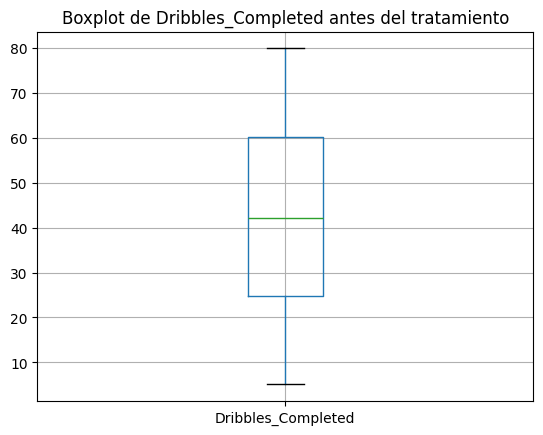

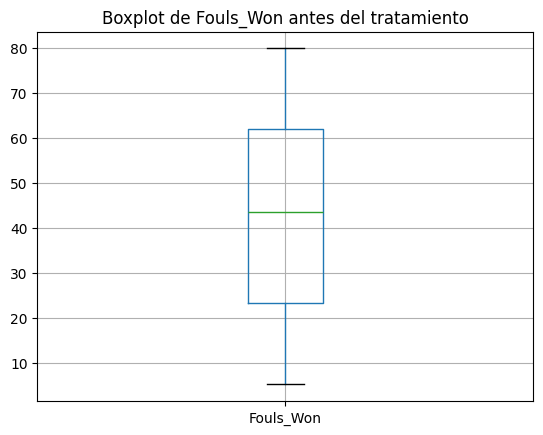

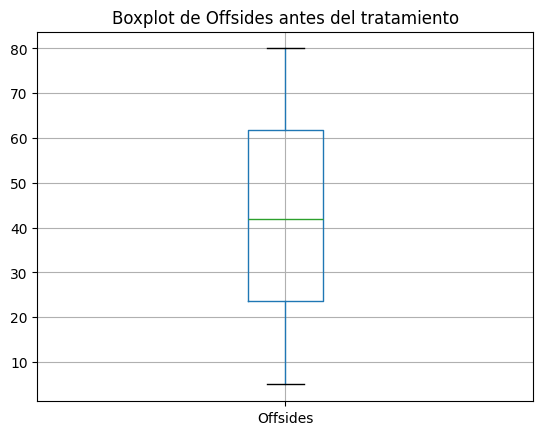

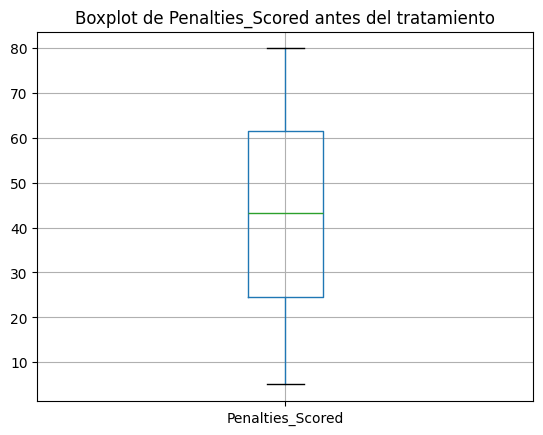

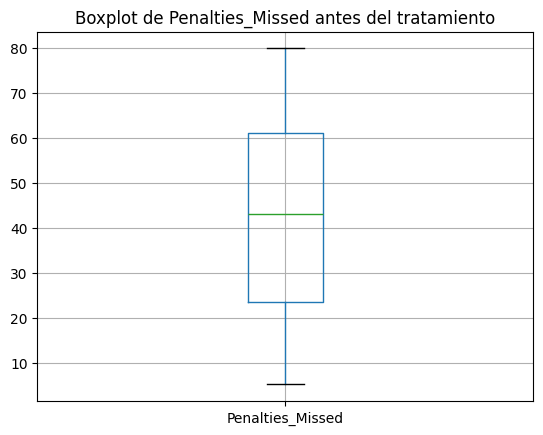

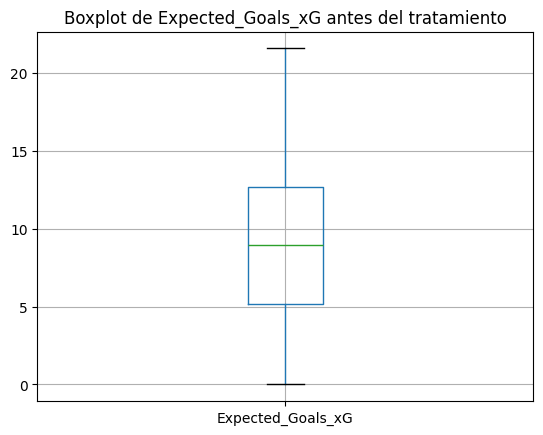

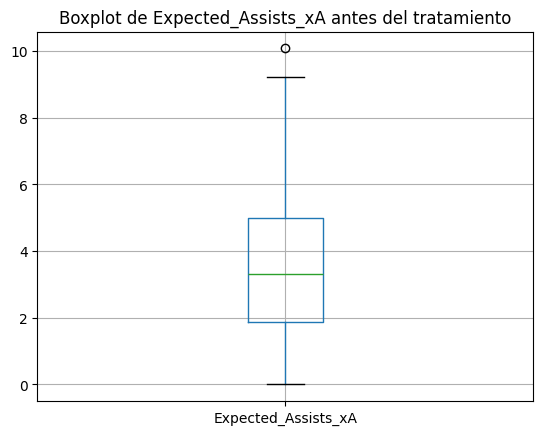

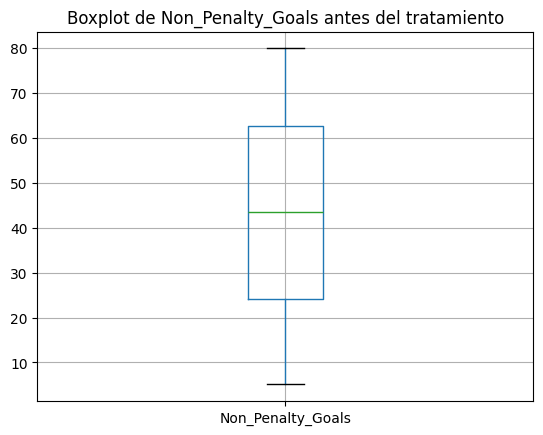

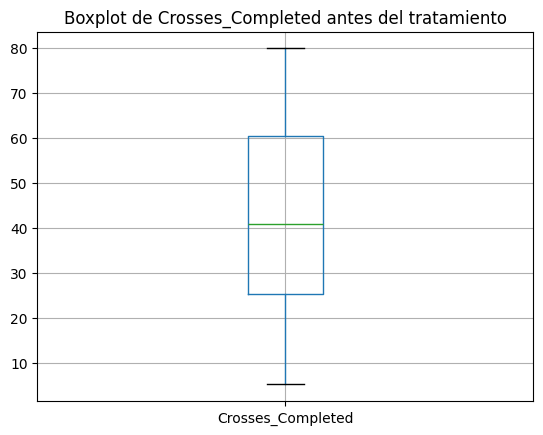

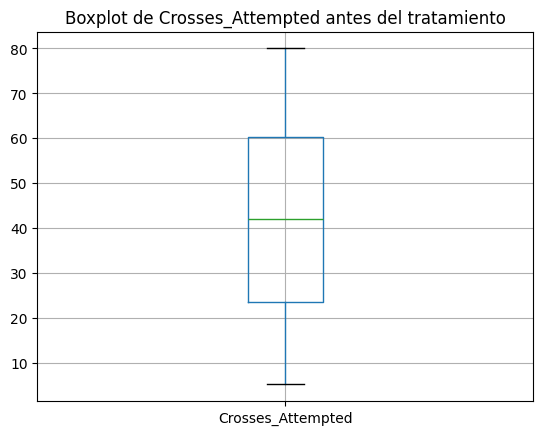

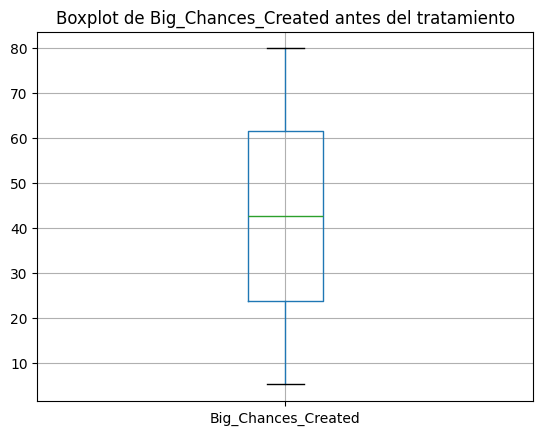

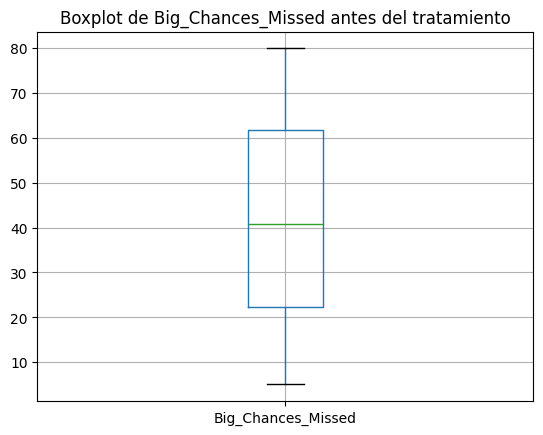

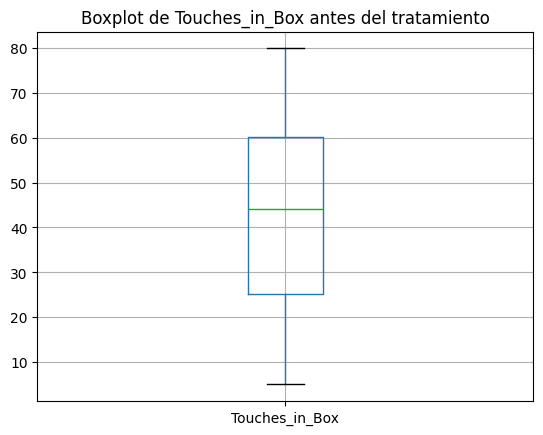

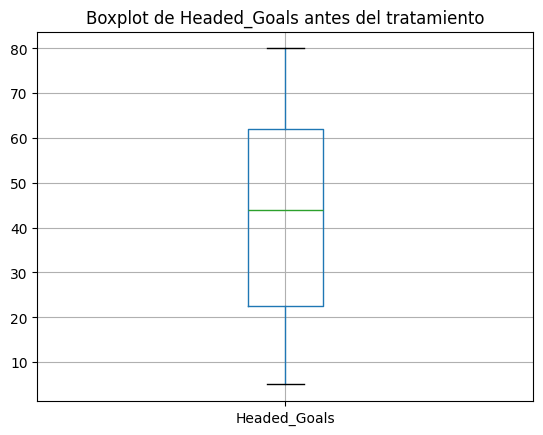

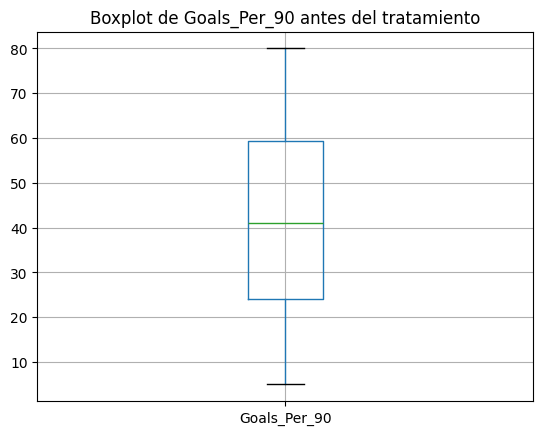

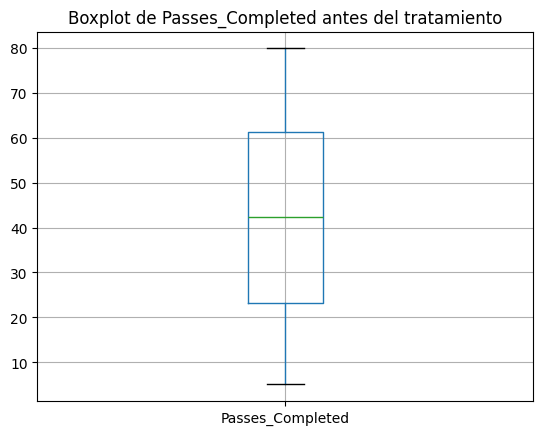

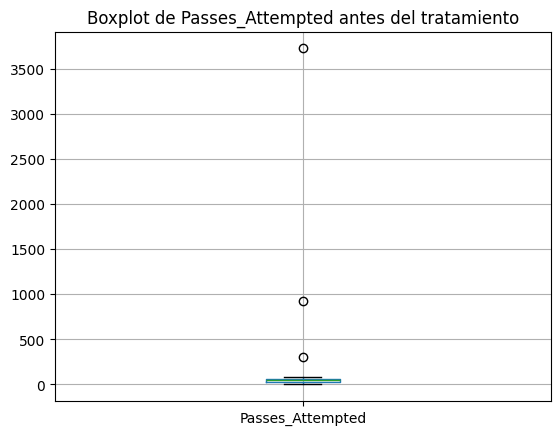

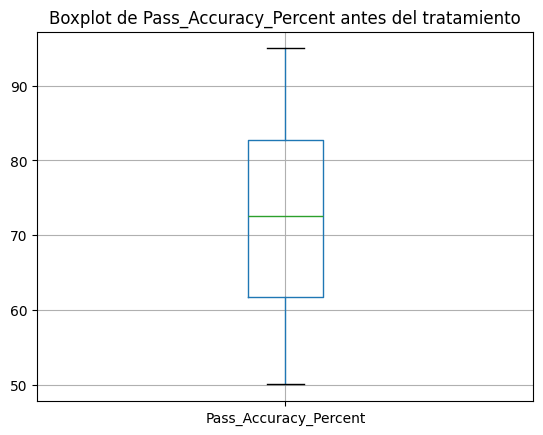

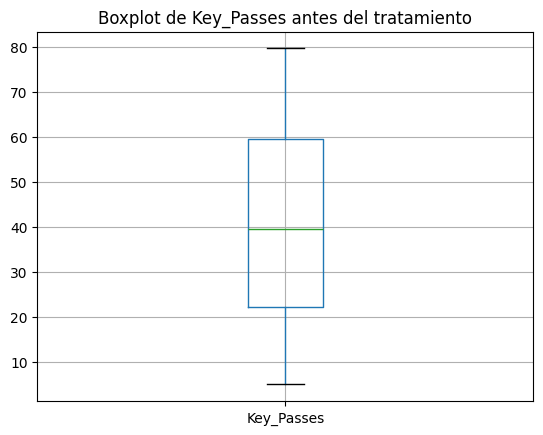

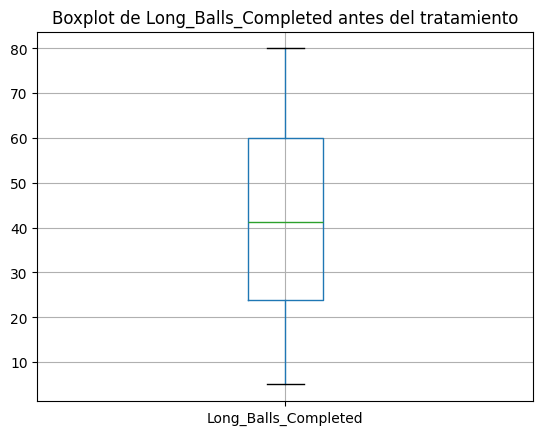

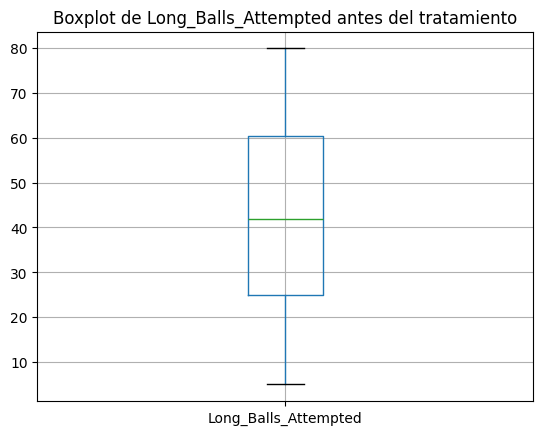

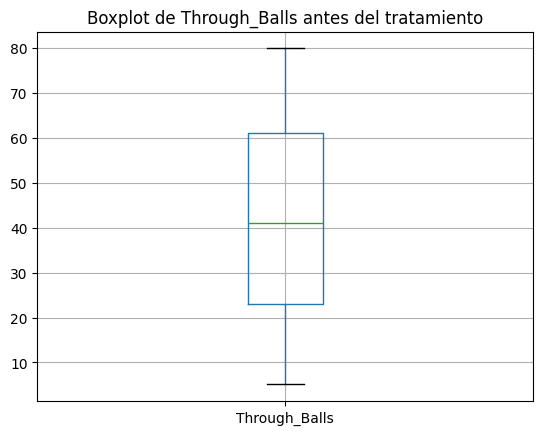

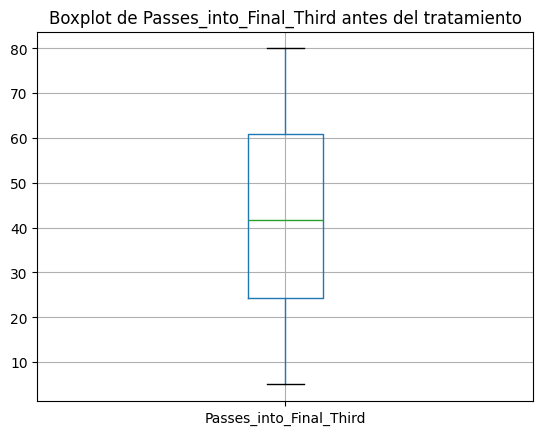

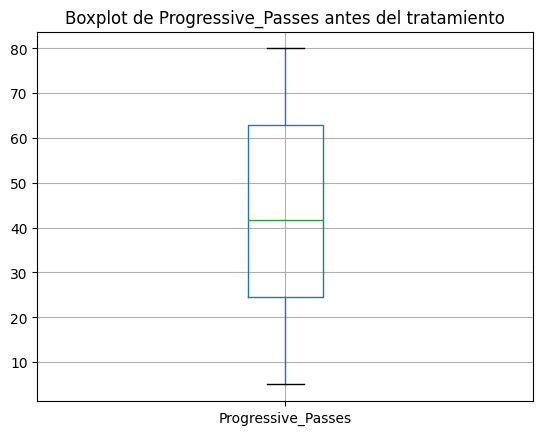

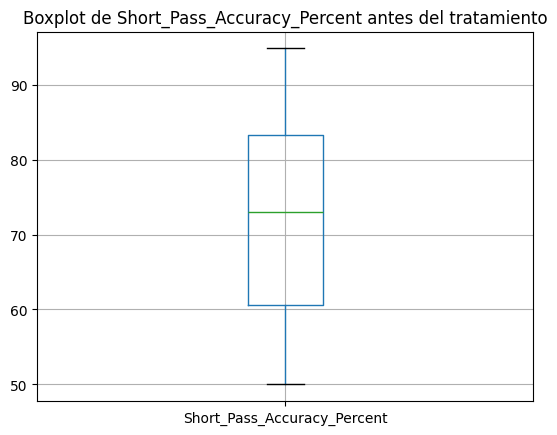

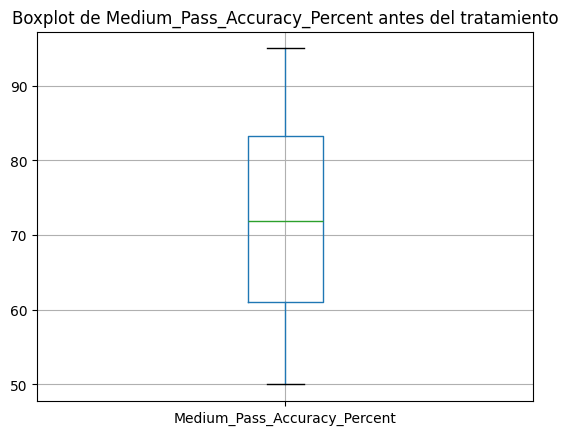

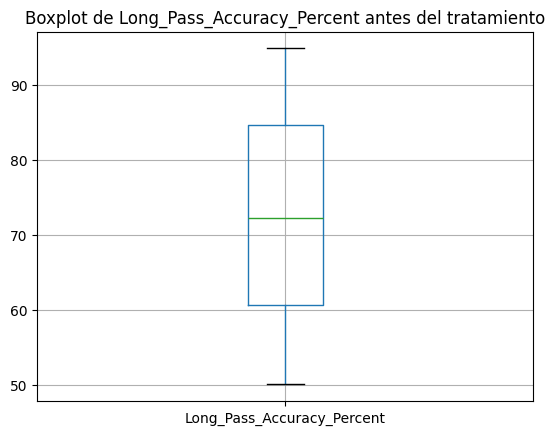

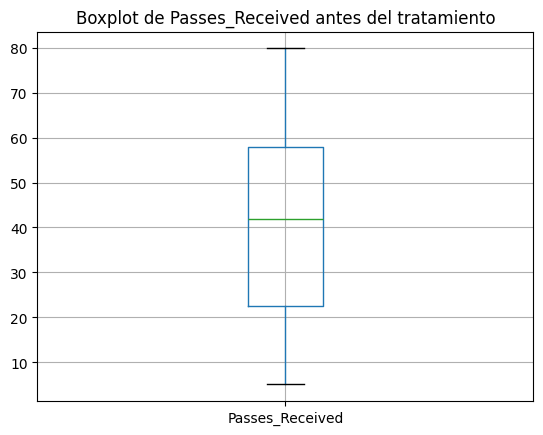

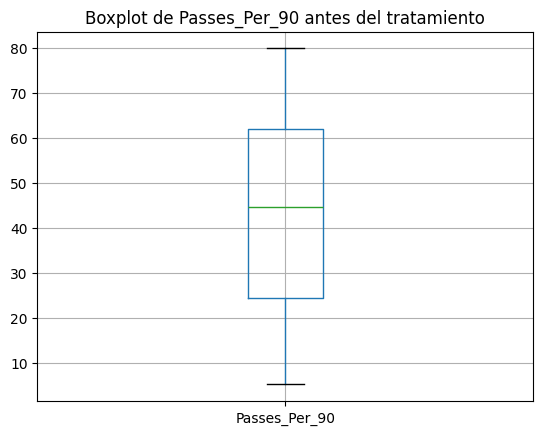

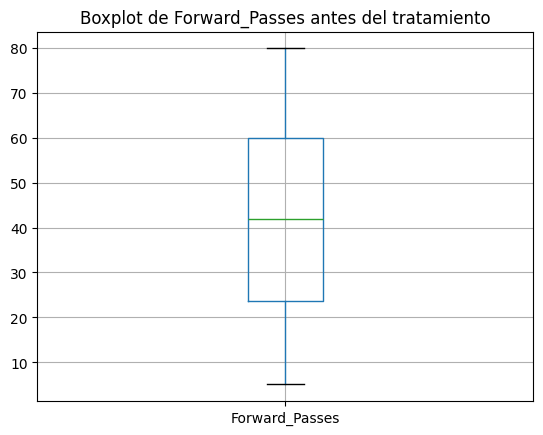

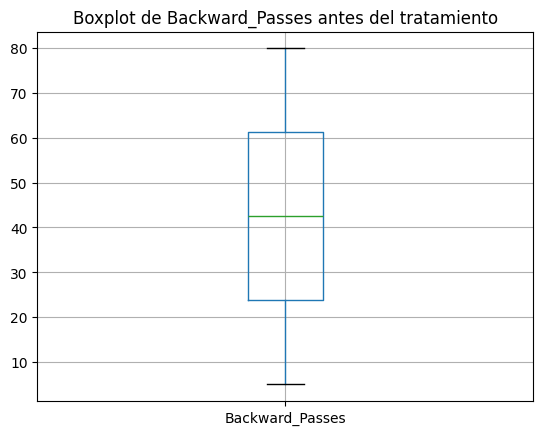

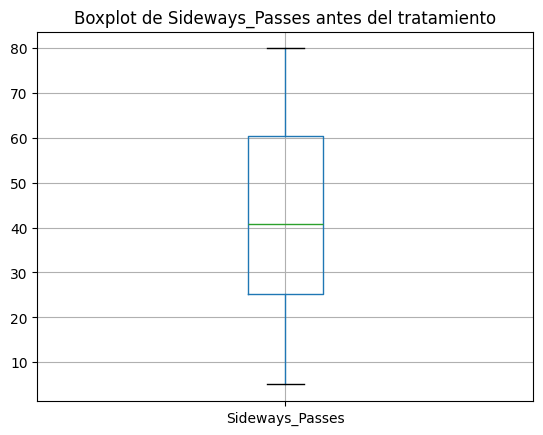

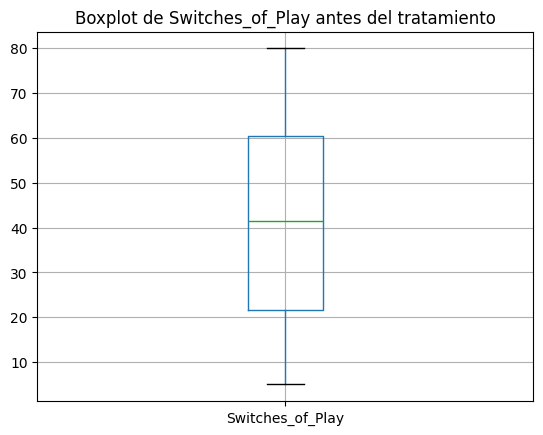

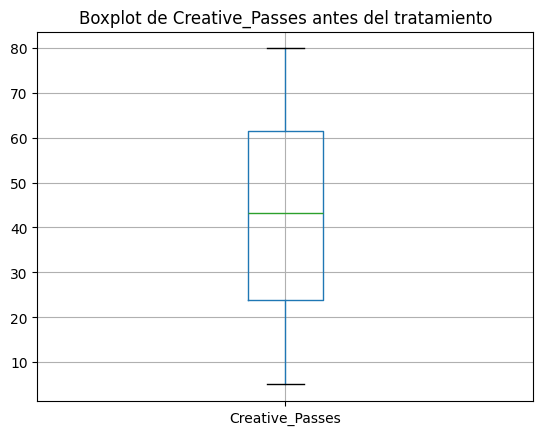

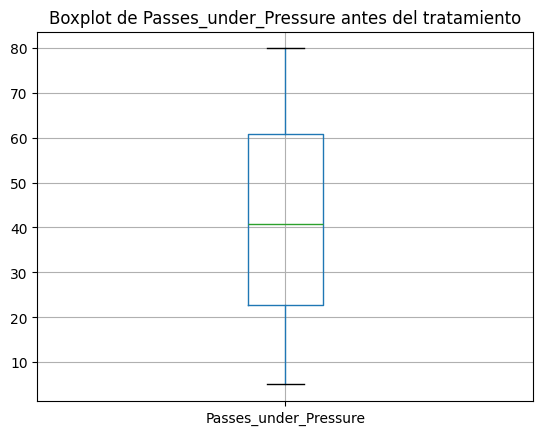

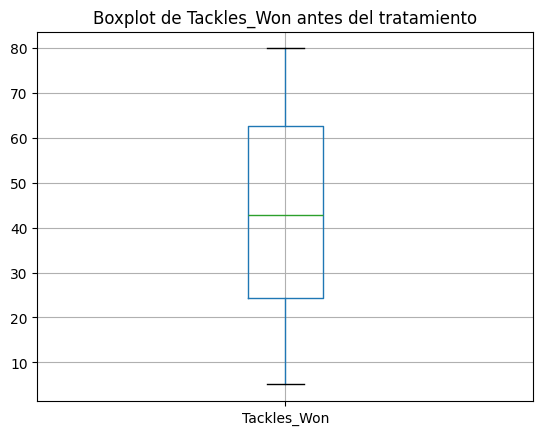

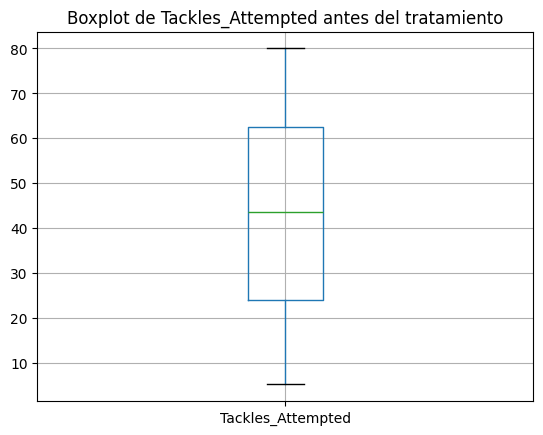

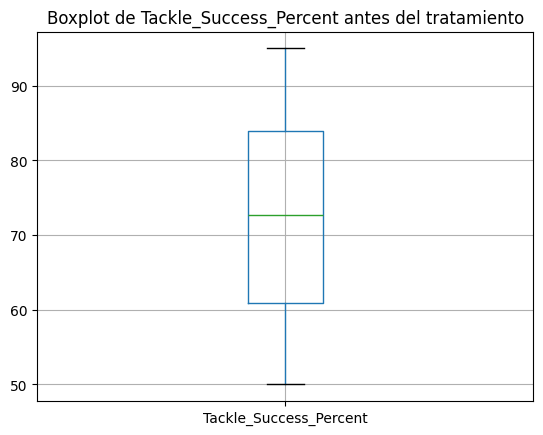

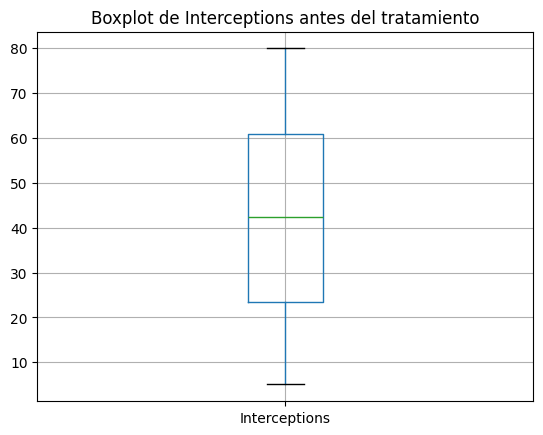

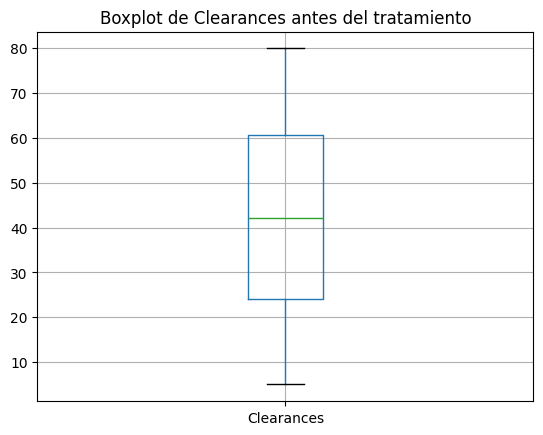

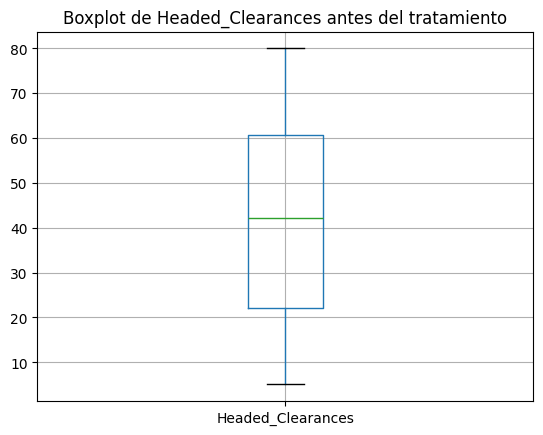

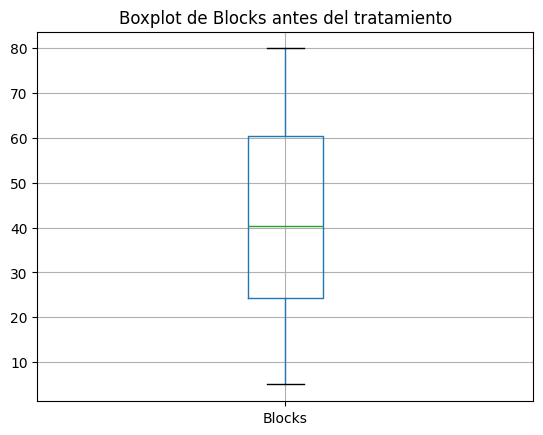

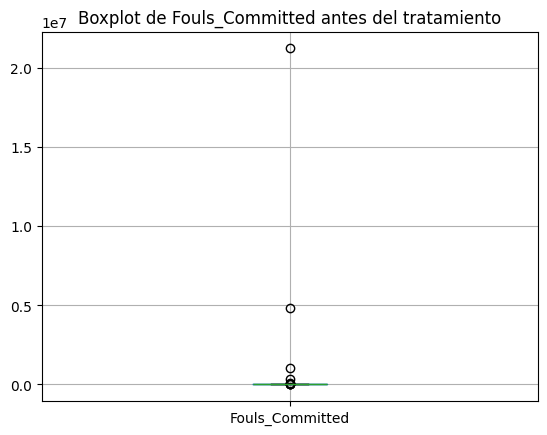

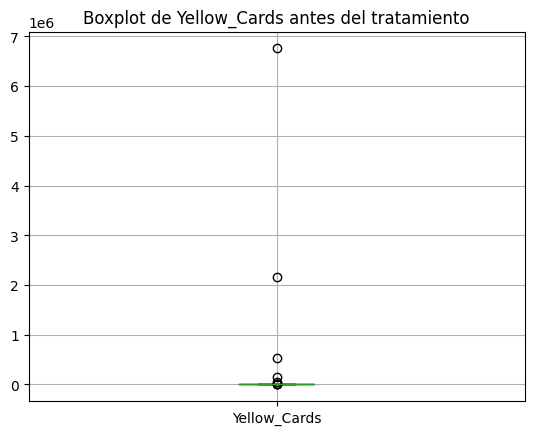

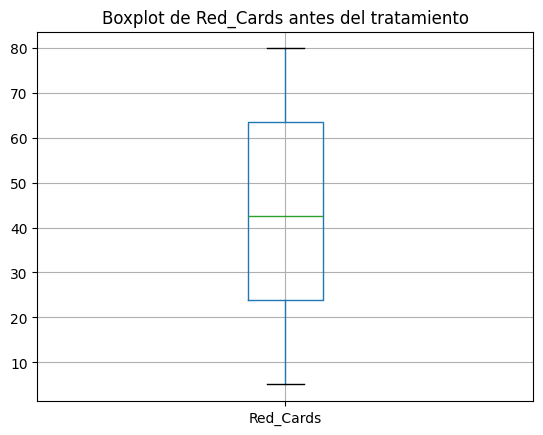

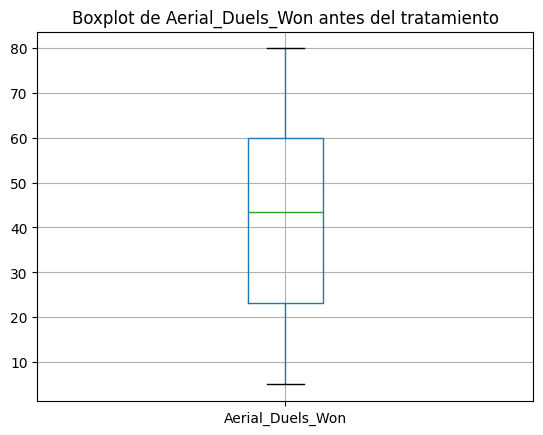

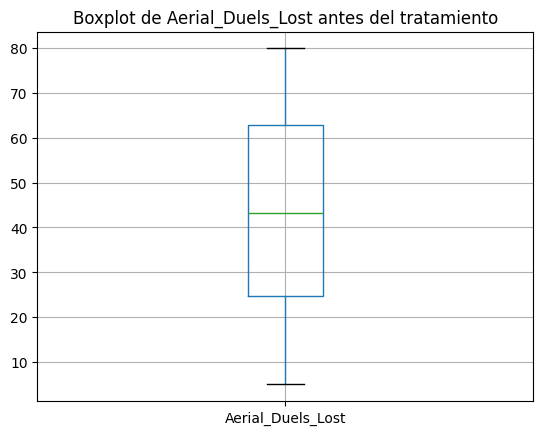

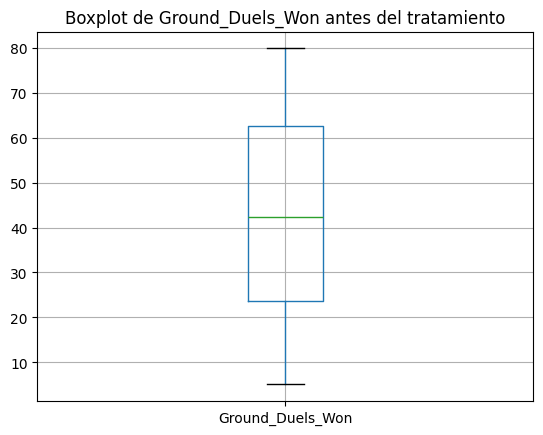

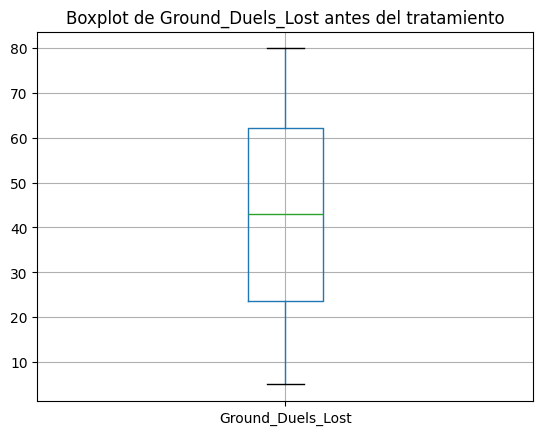

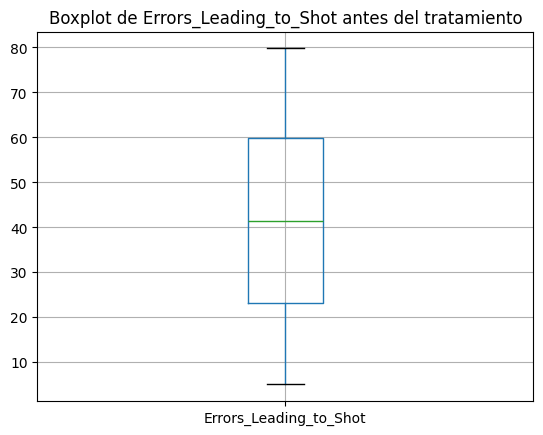

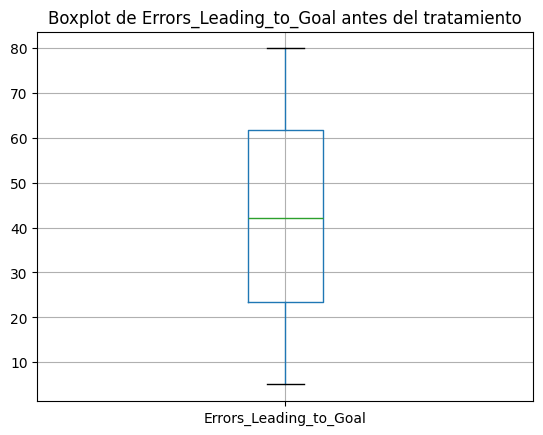

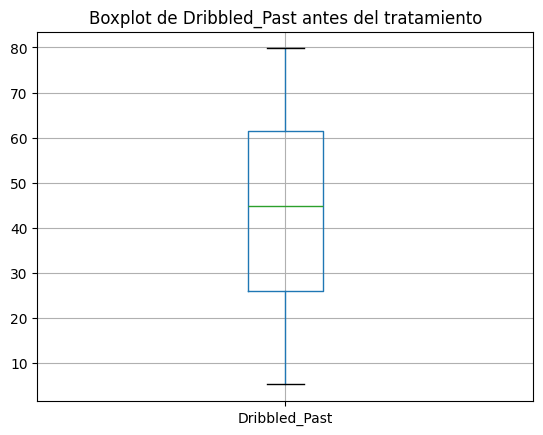

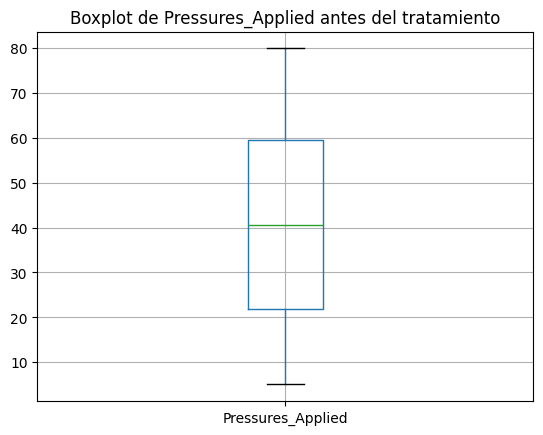

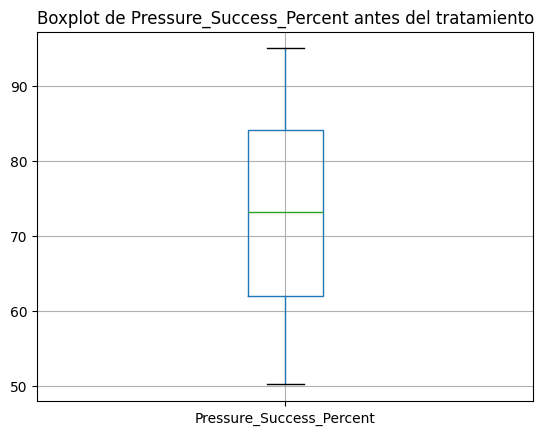

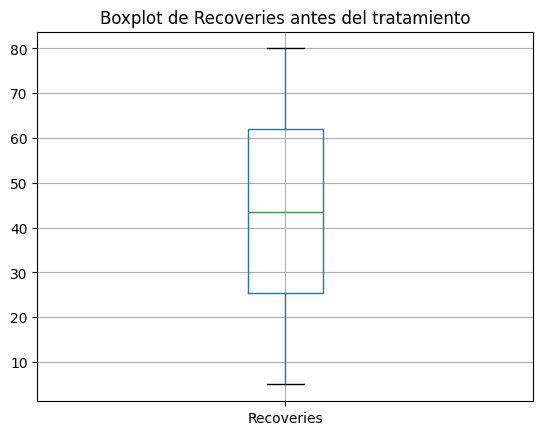

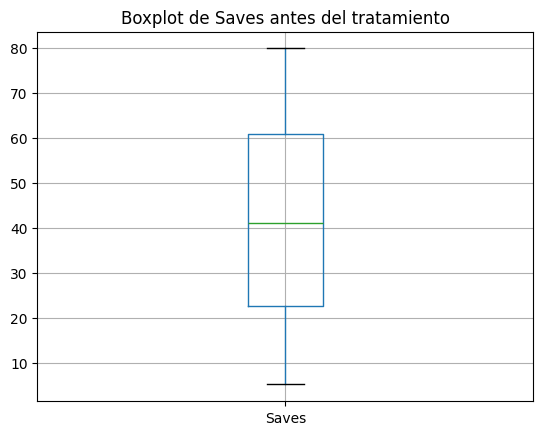

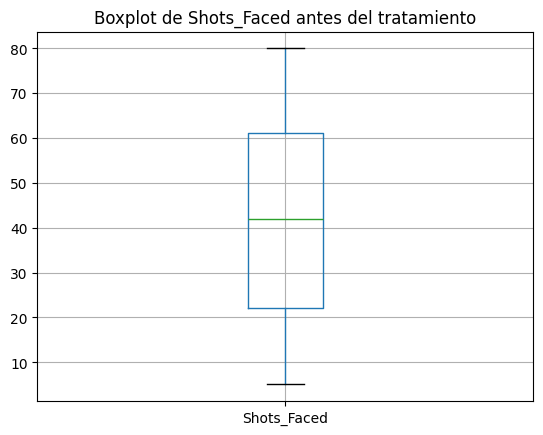

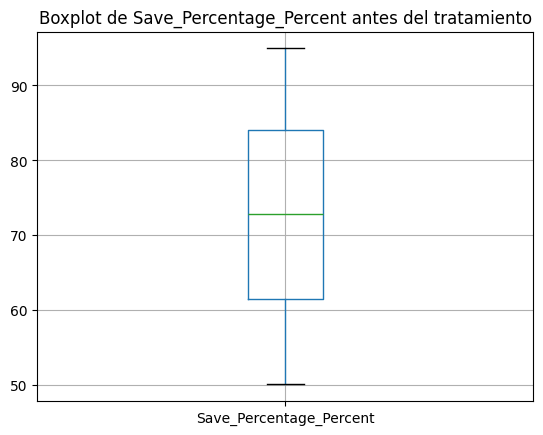

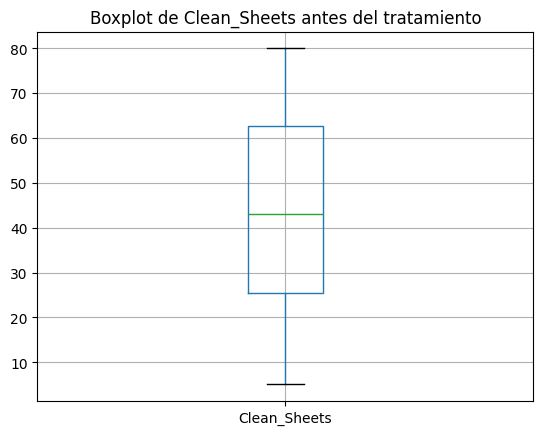

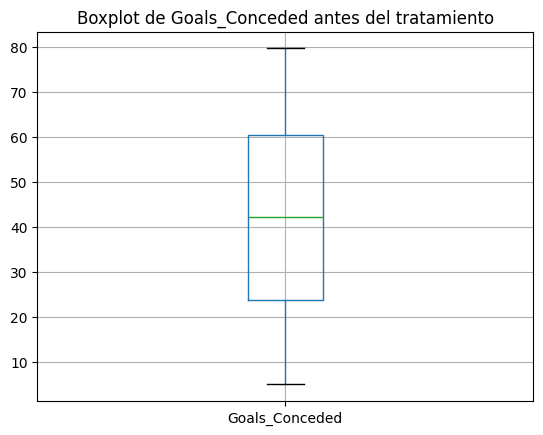

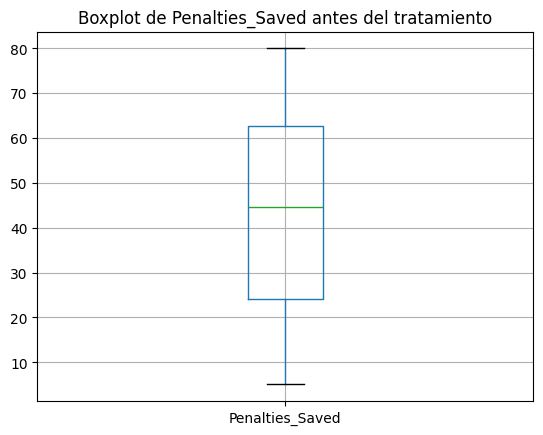

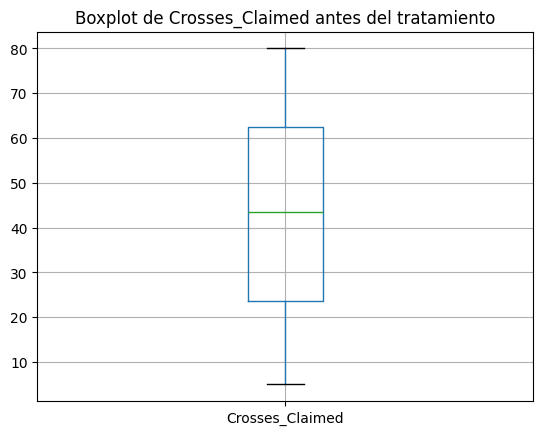

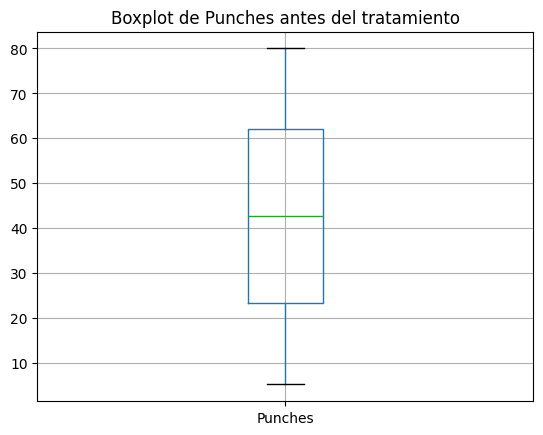

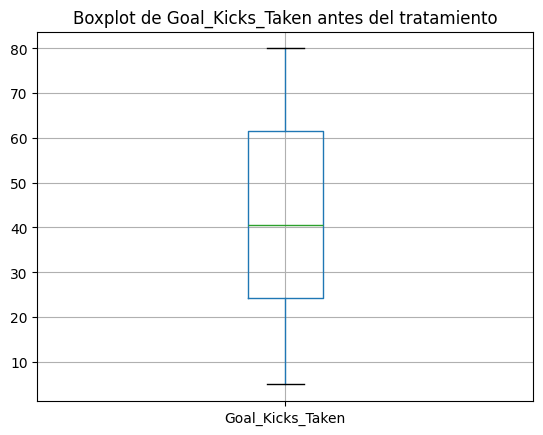

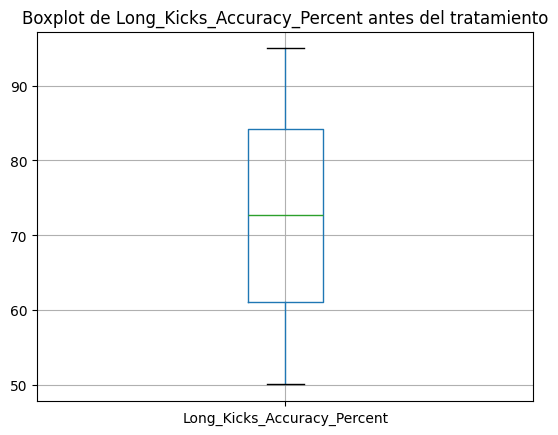

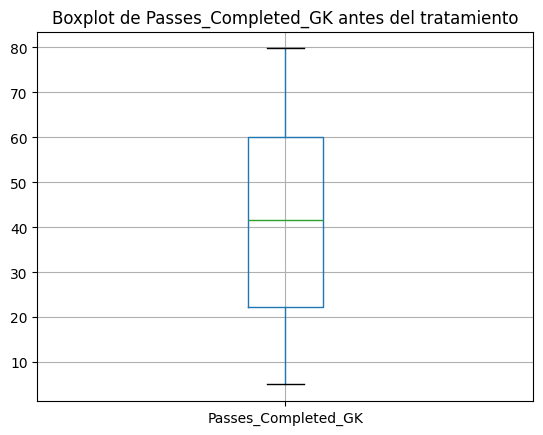

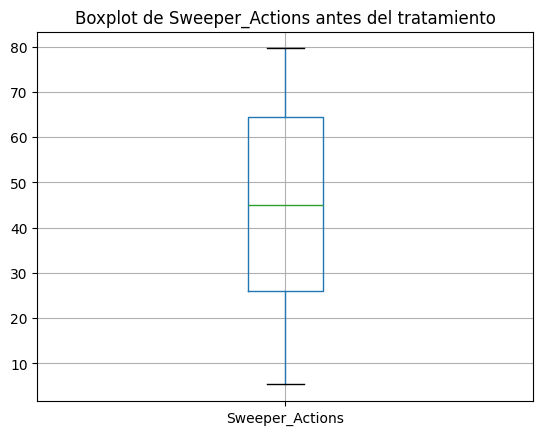

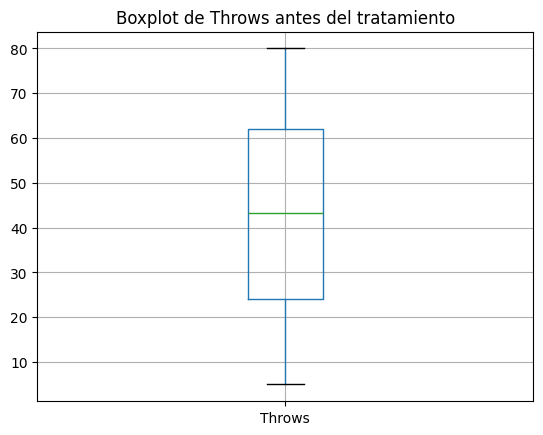

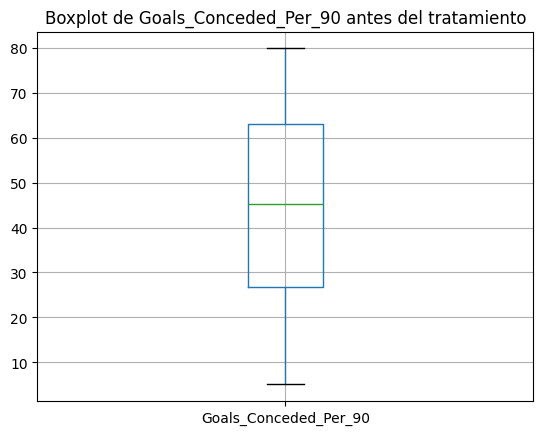

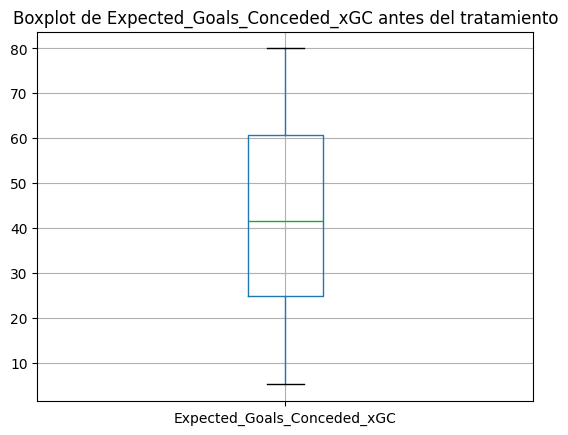

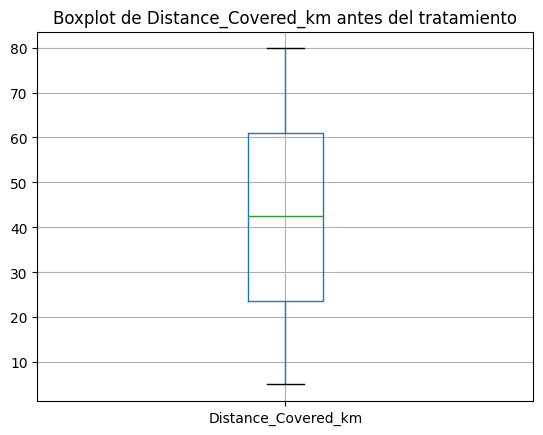

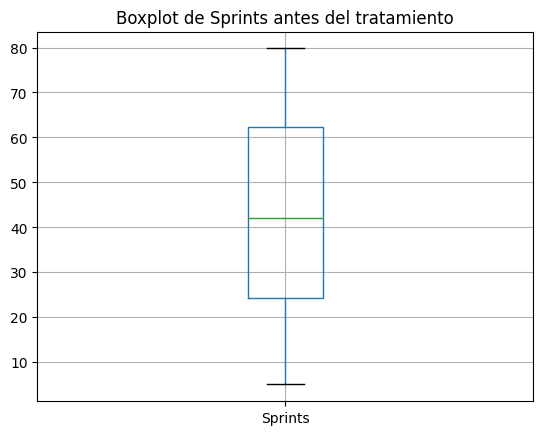

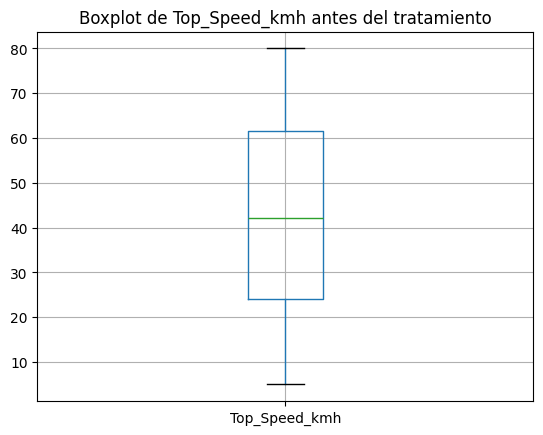

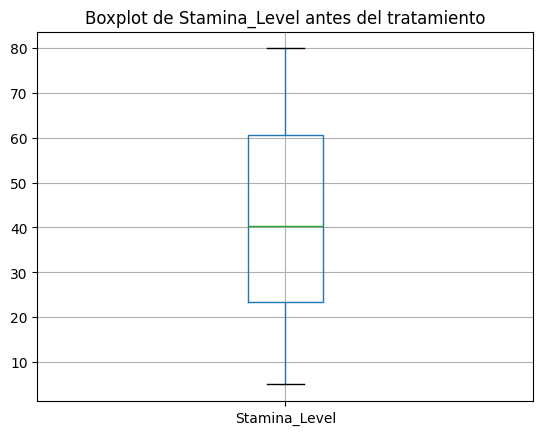

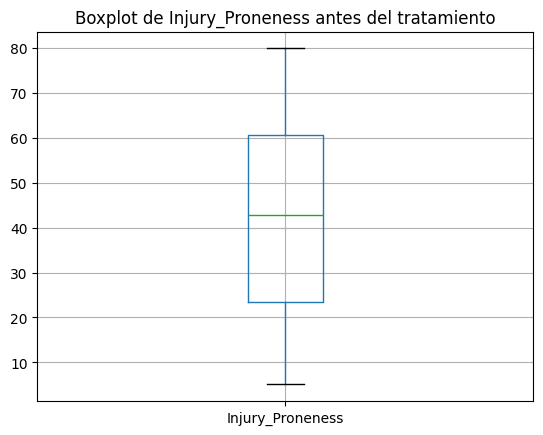

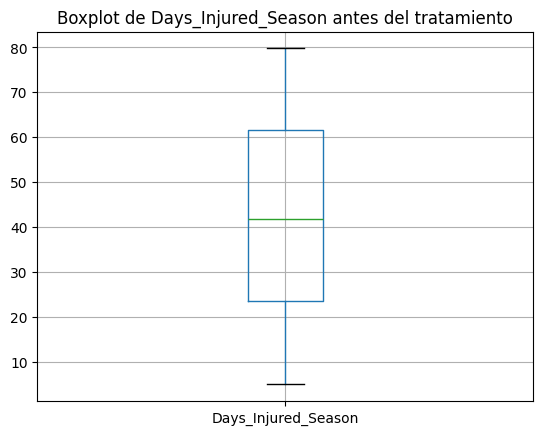

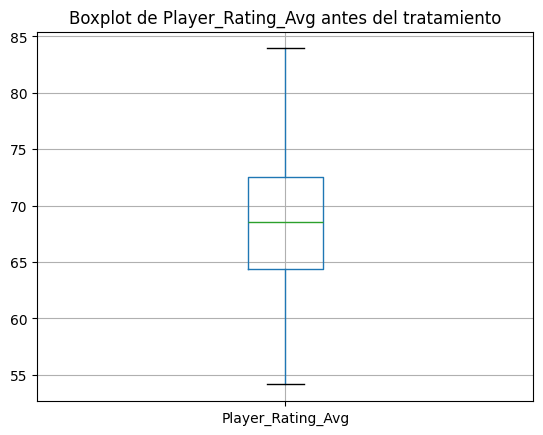

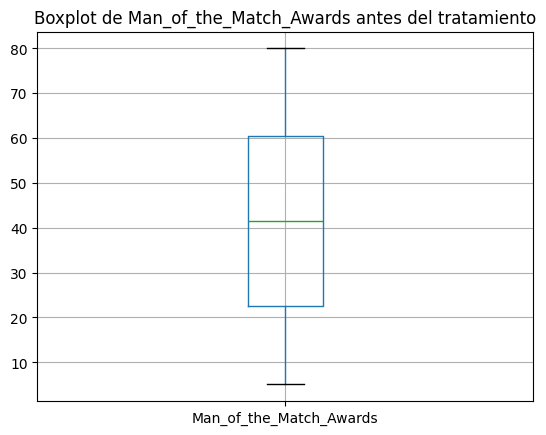

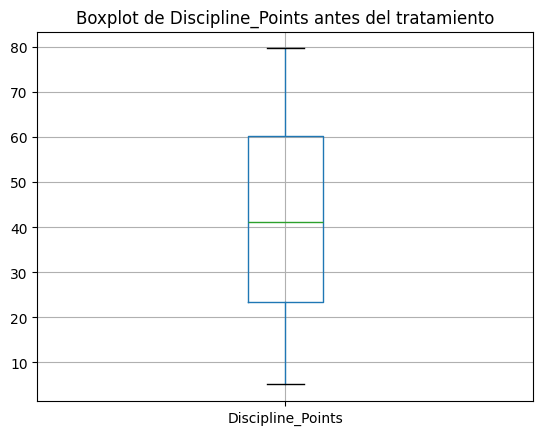

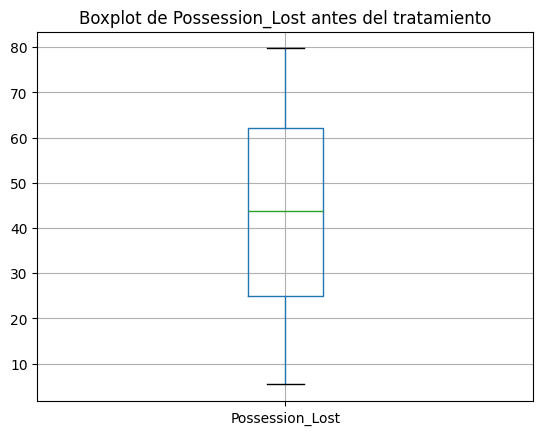

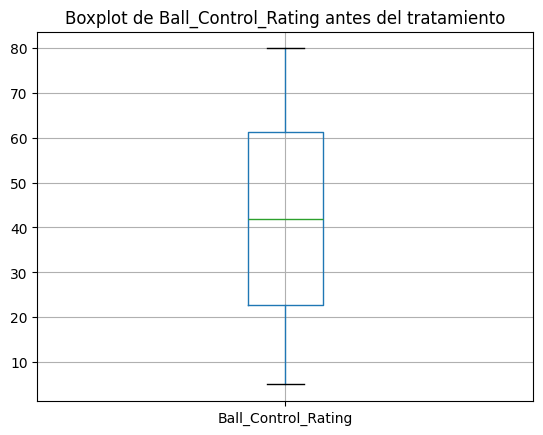

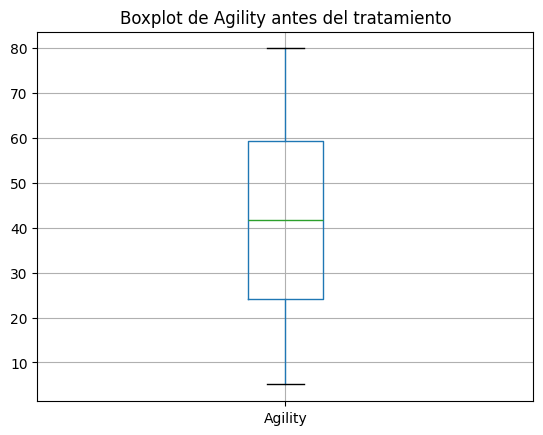

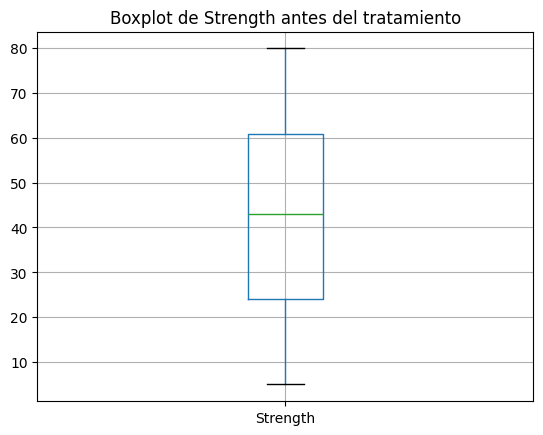

In [16]:
import matplotlib.pyplot as plt
print("Graficos boxplots antes del tratamiento")
numColsAntes = dfOriginal.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numColsAntes:
    plt.figure()
    dfOriginal.boxplot(column=col)
    plt.title(f'Boxplot de {col} antes del tratamiento')
    plt.show()

Graficos boxplots después del tratamiento


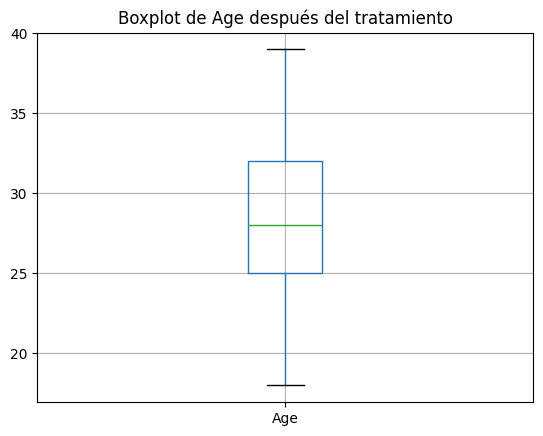

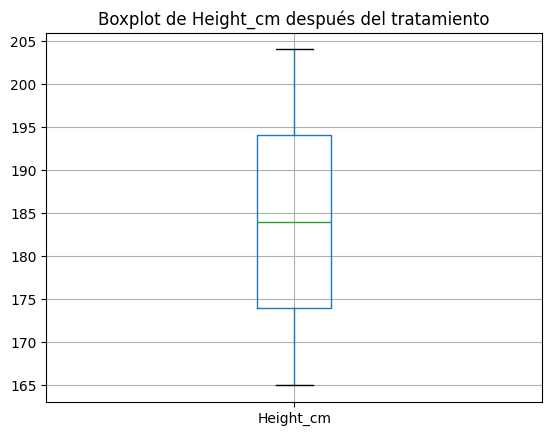

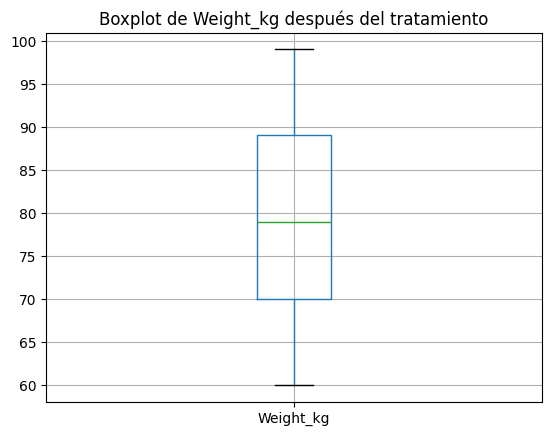

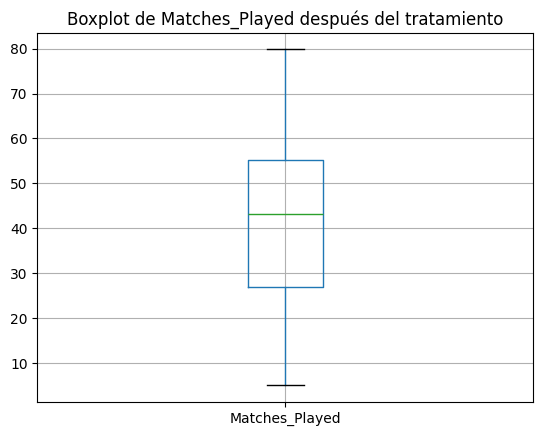

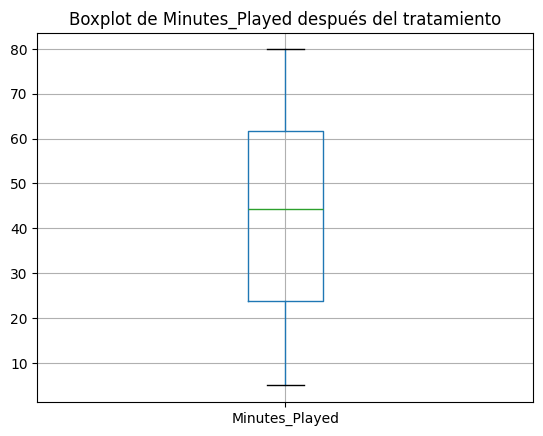

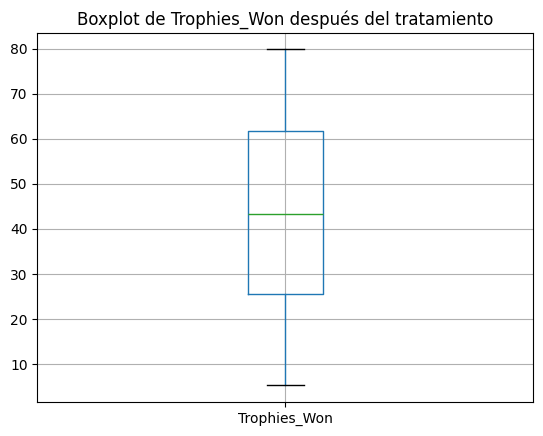

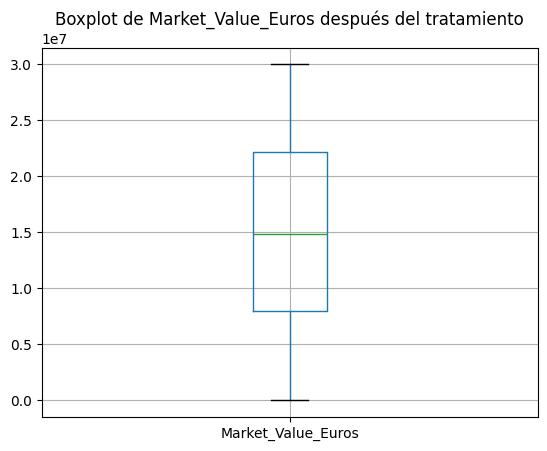

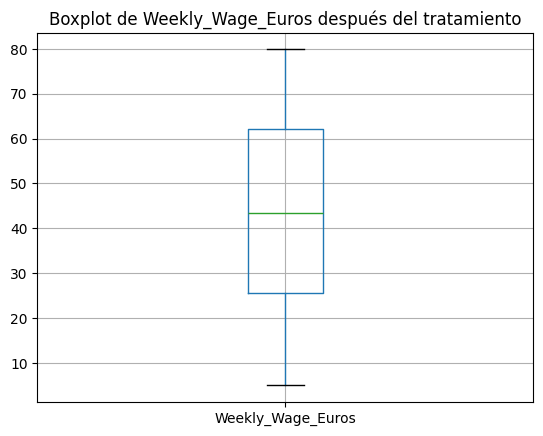

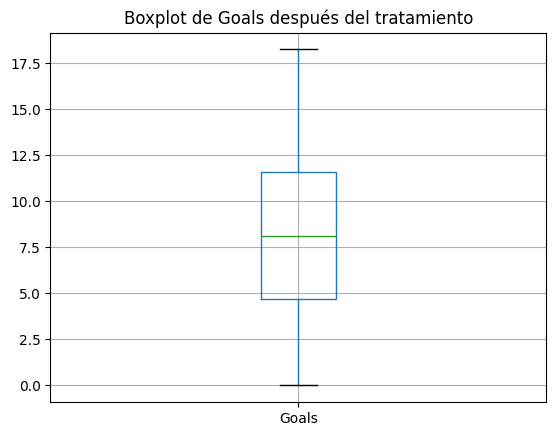

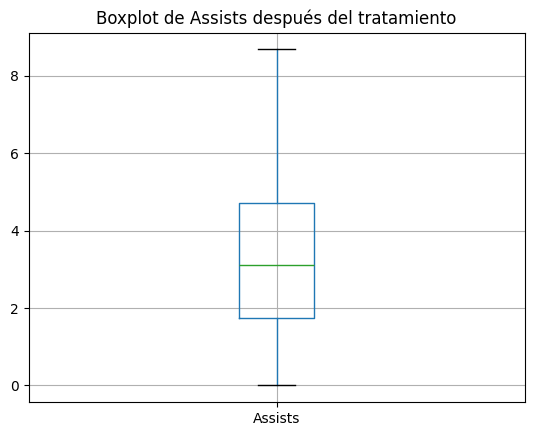

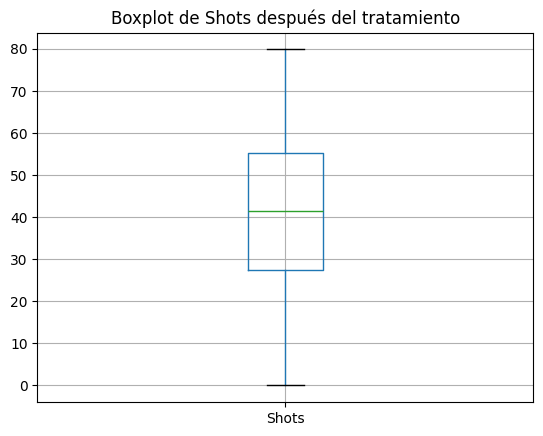

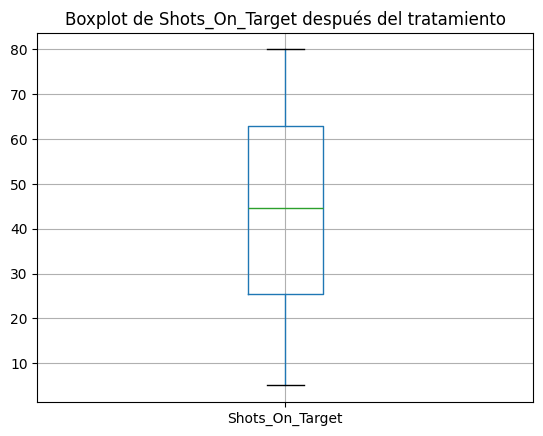

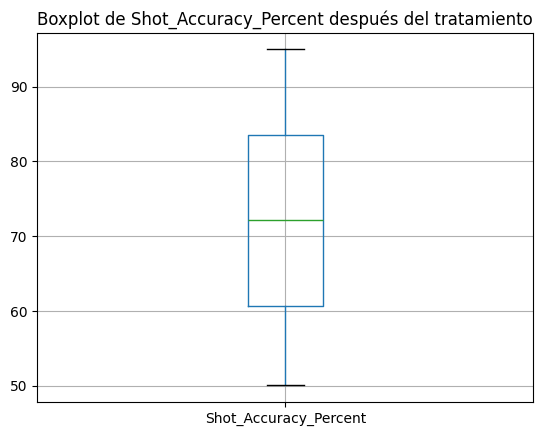

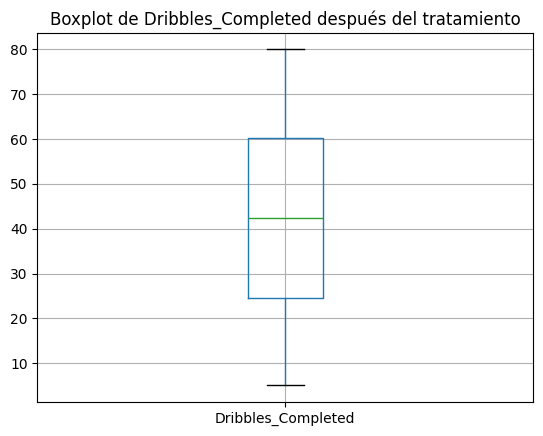

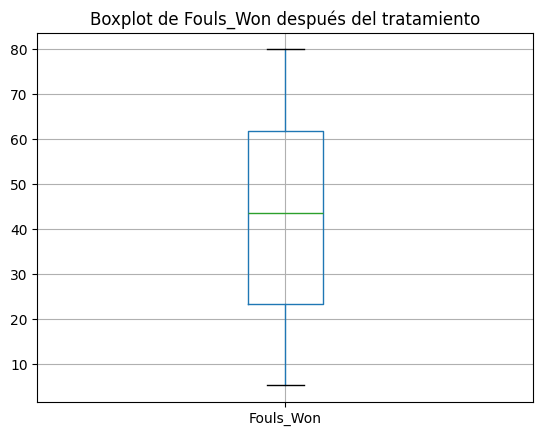

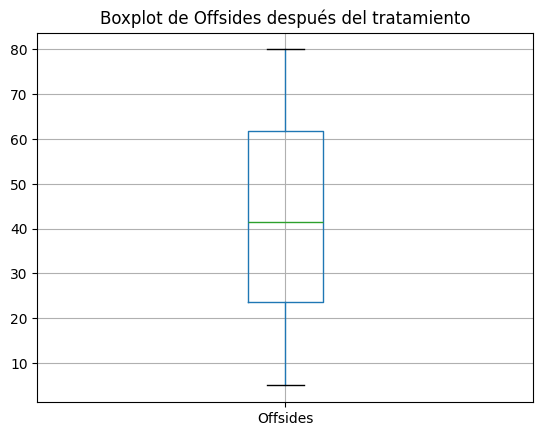

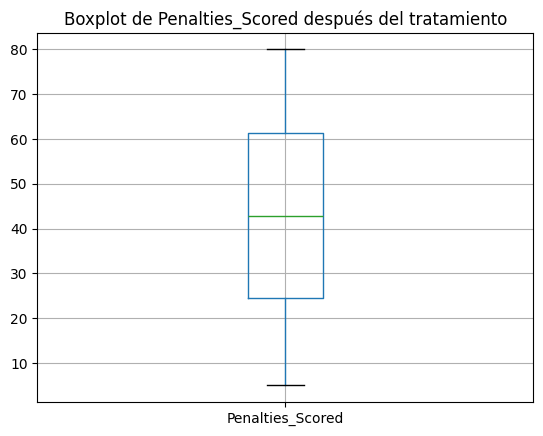

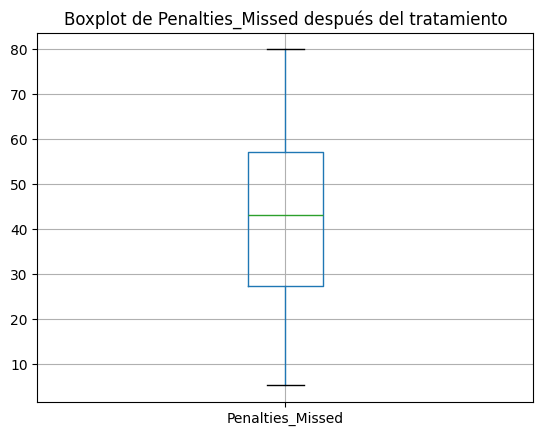

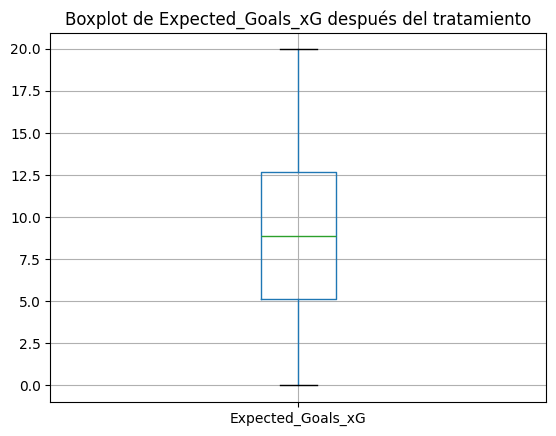

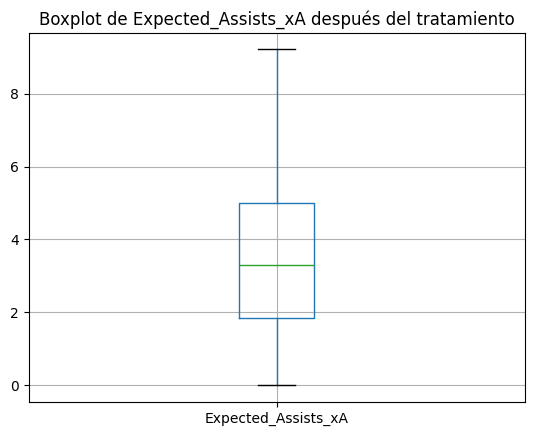

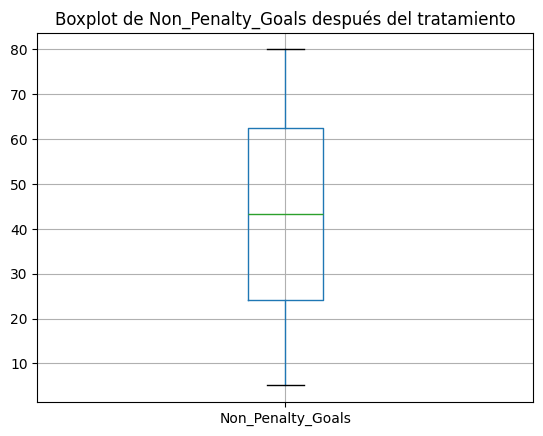

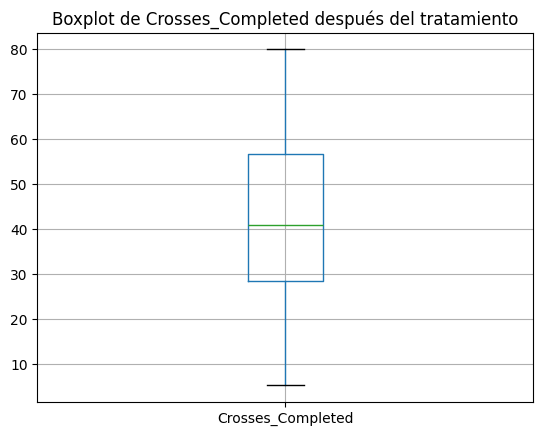

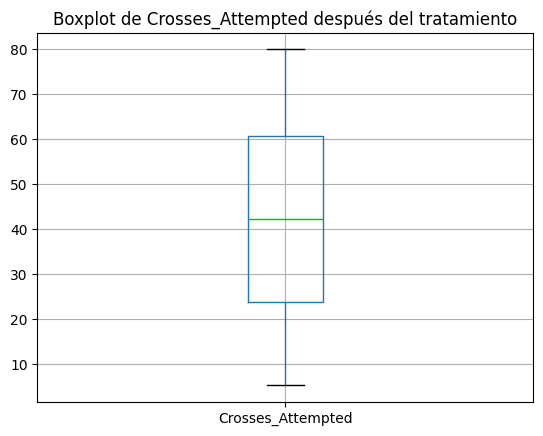

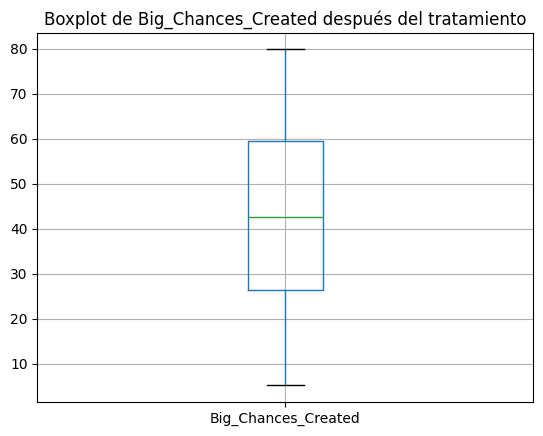

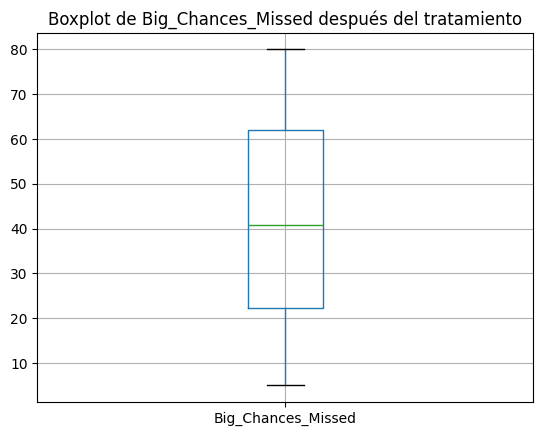

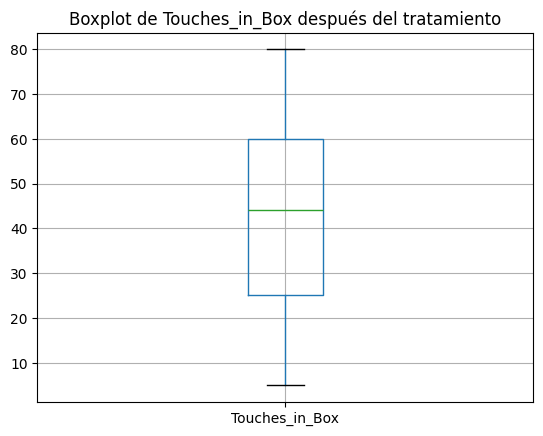

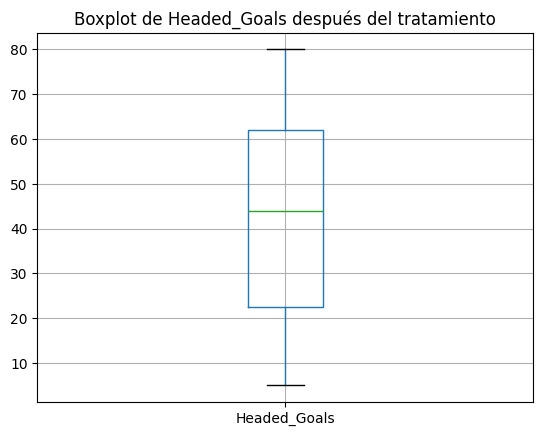

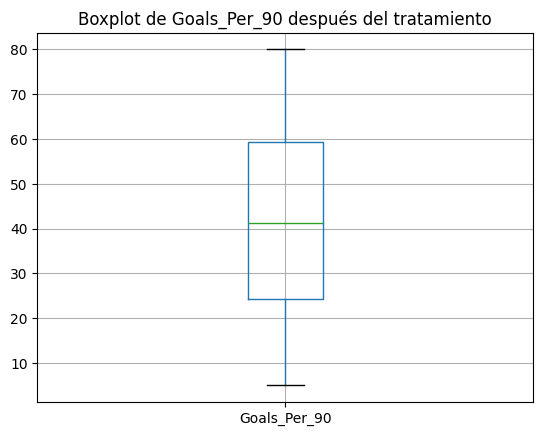

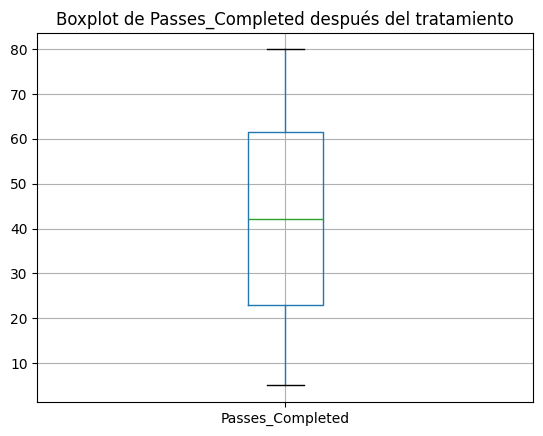

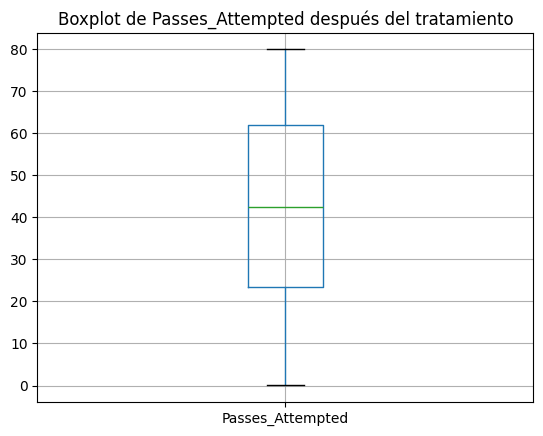

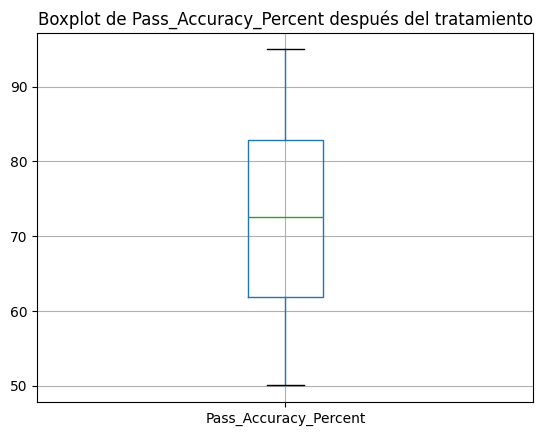

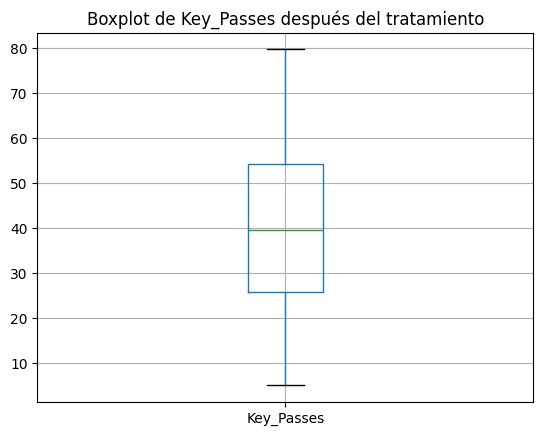

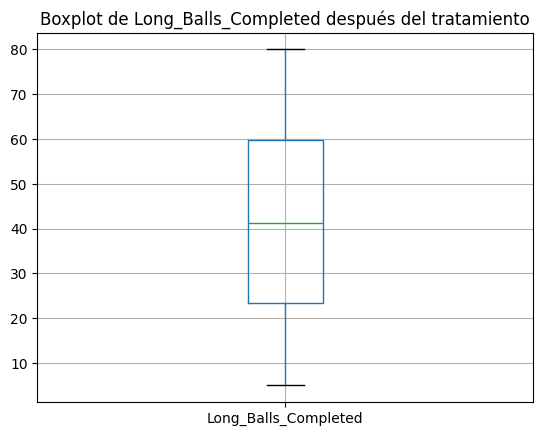

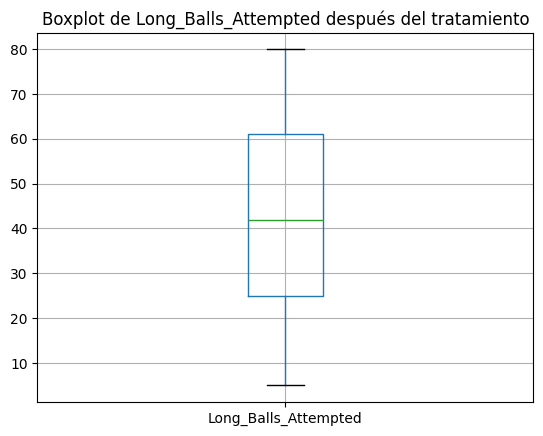

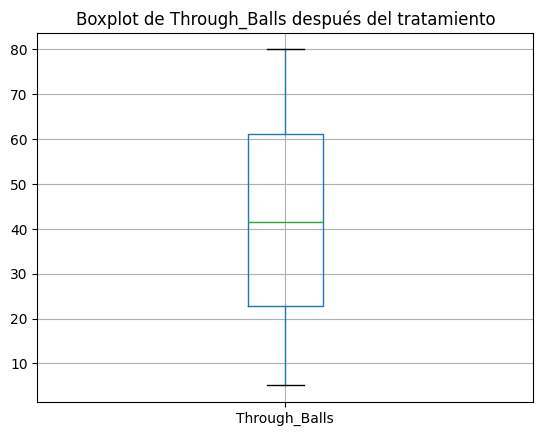

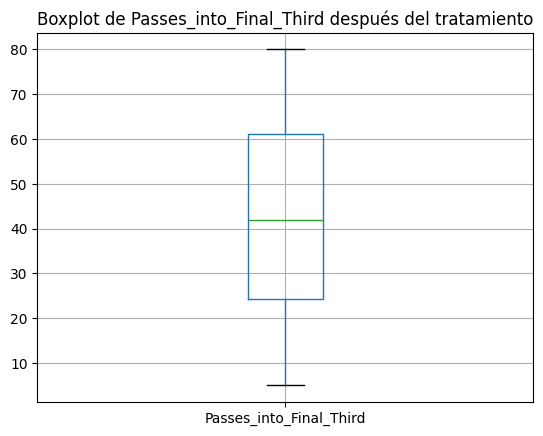

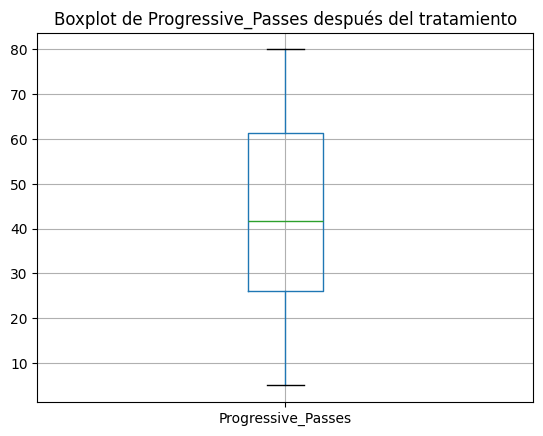

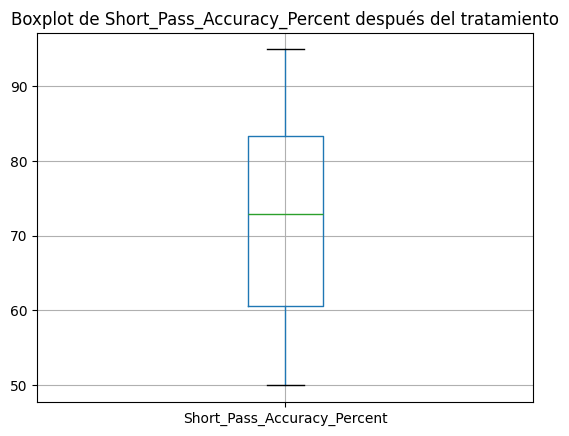

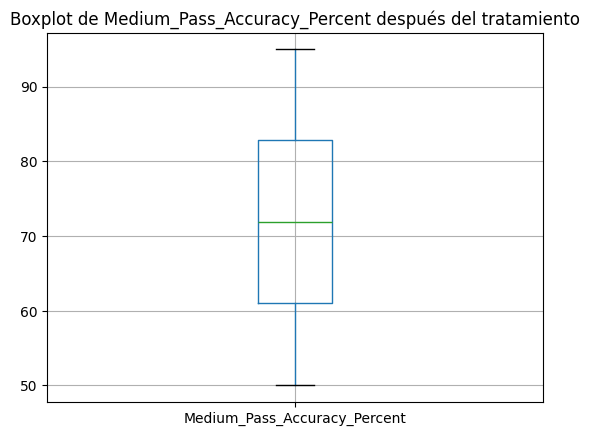

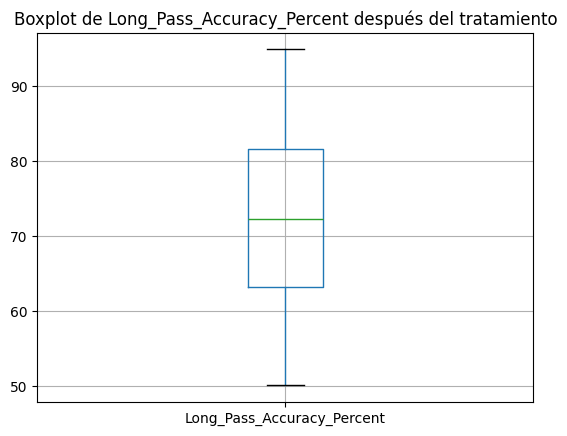

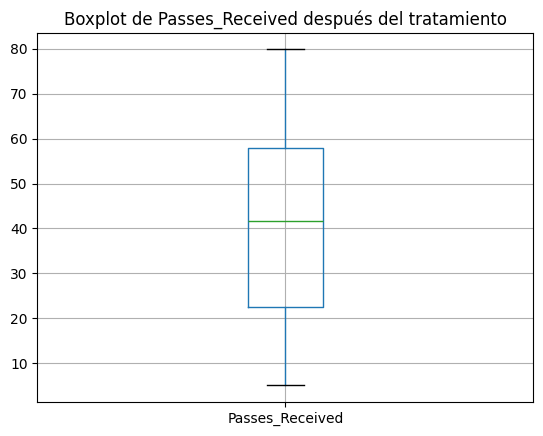

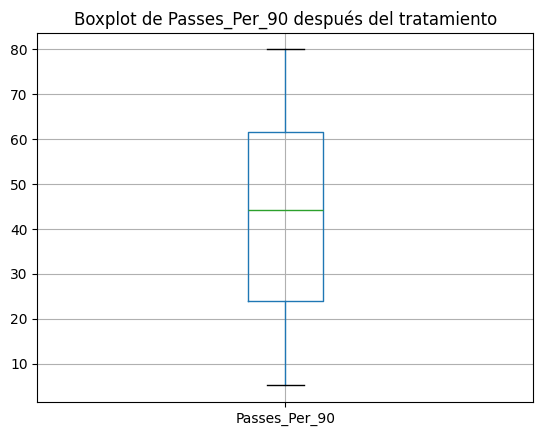

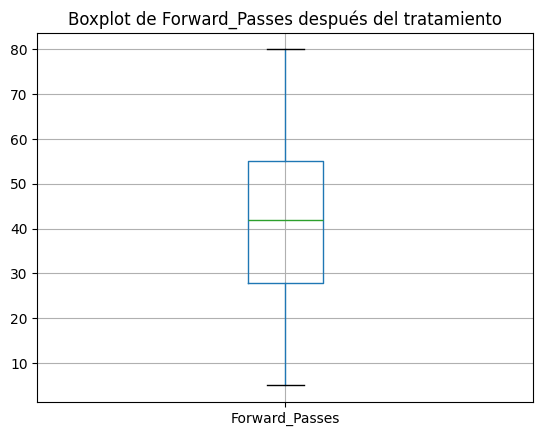

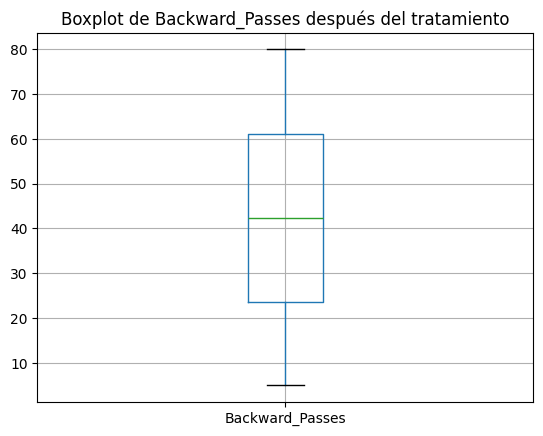

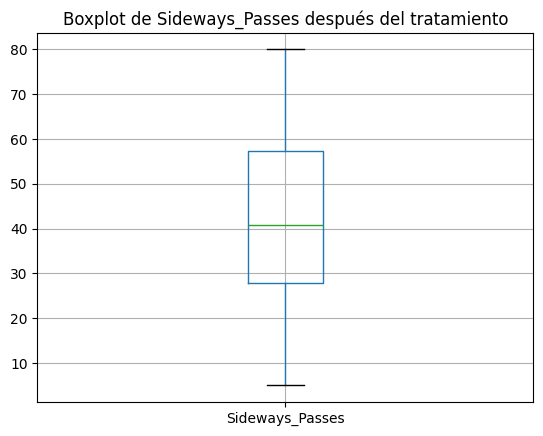

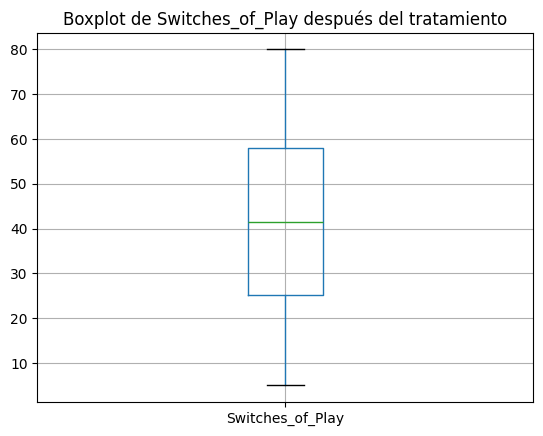

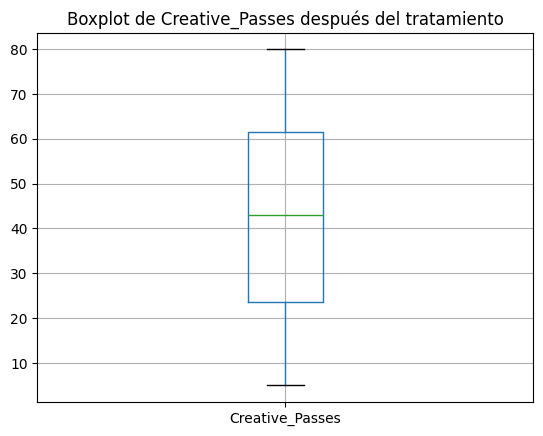

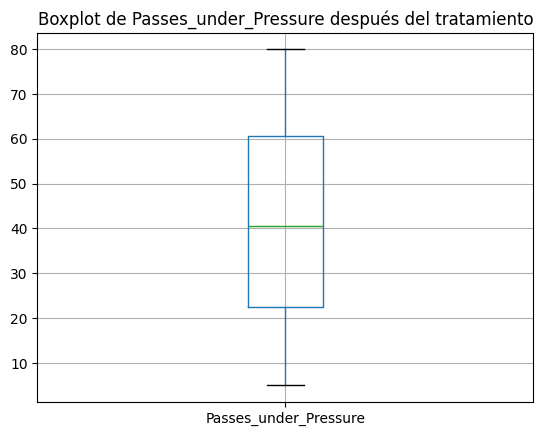

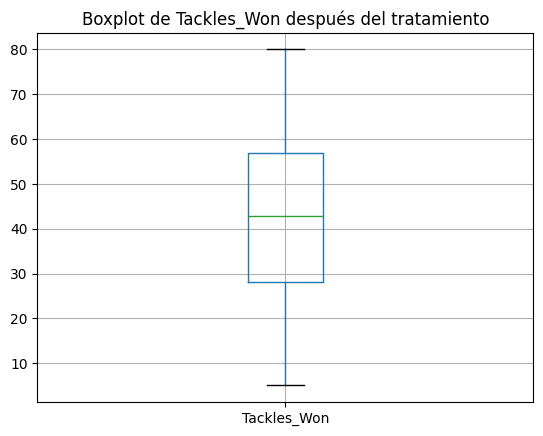

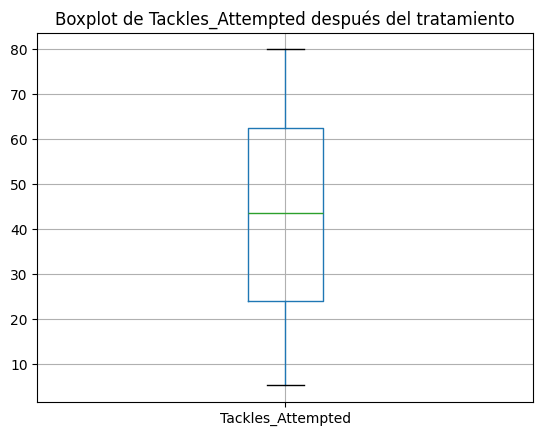

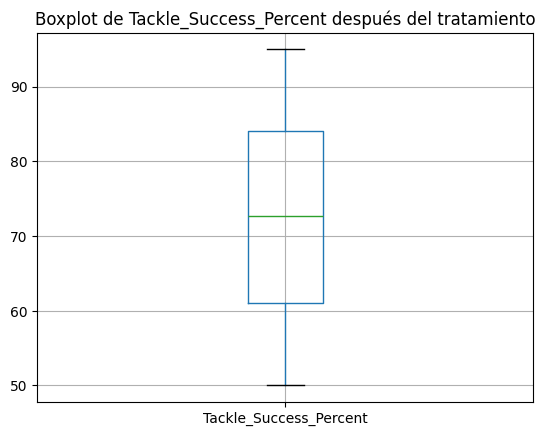

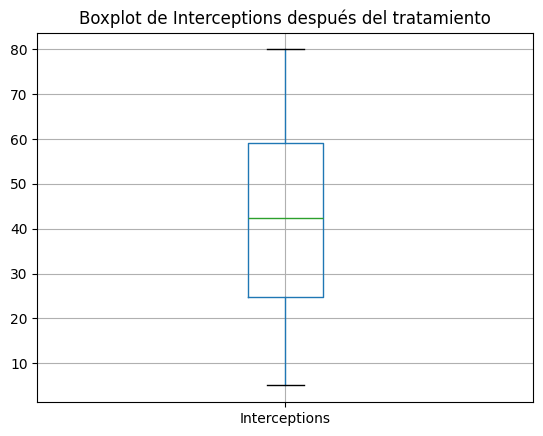

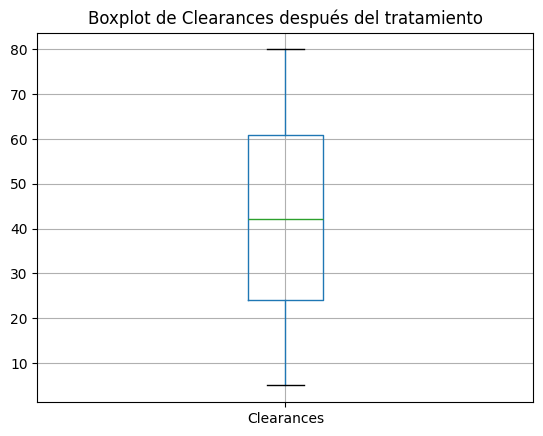

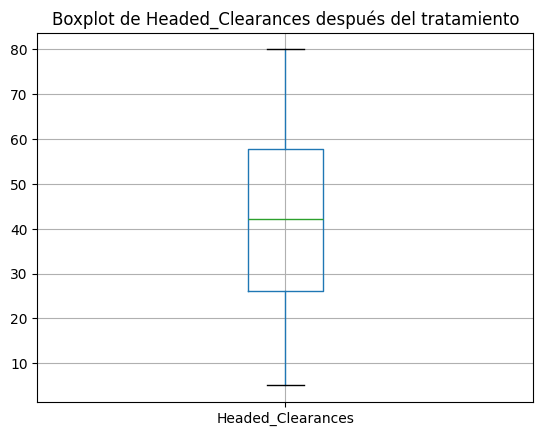

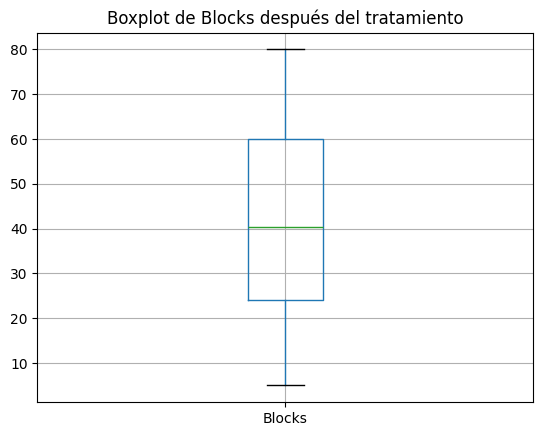

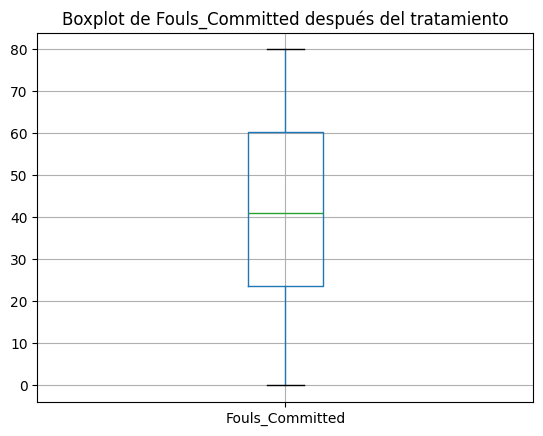

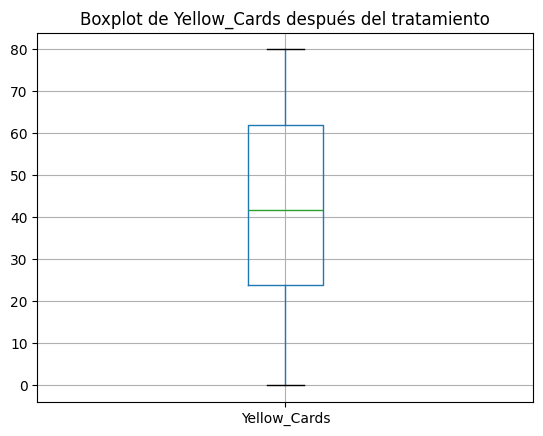

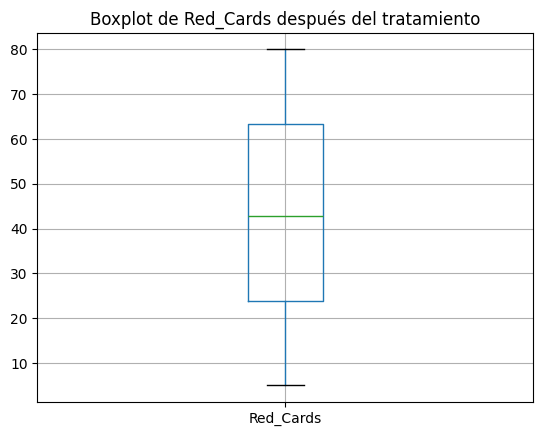

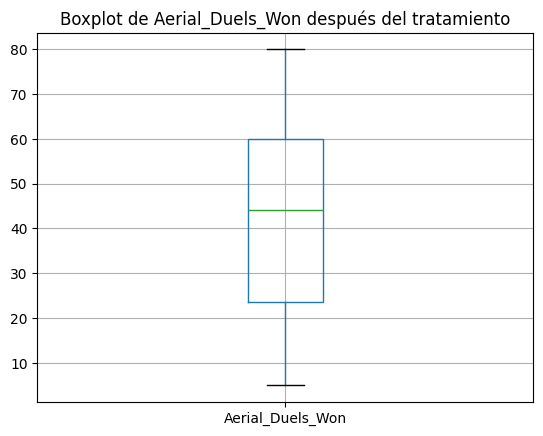

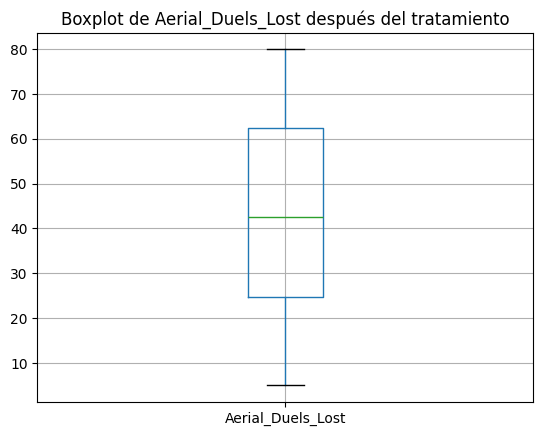

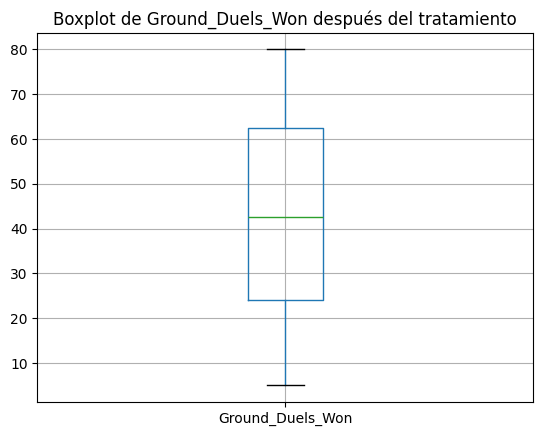

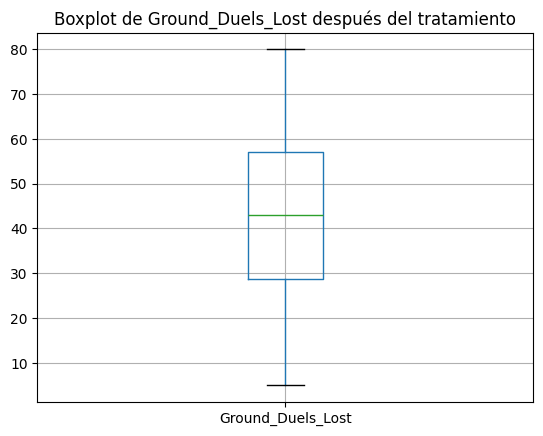

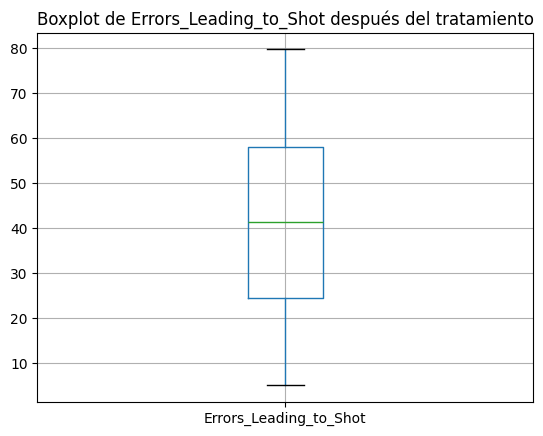

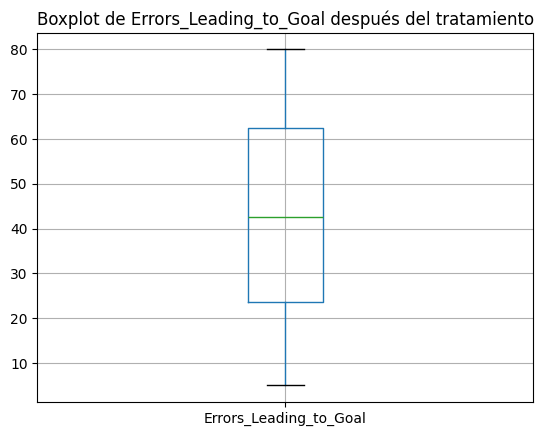

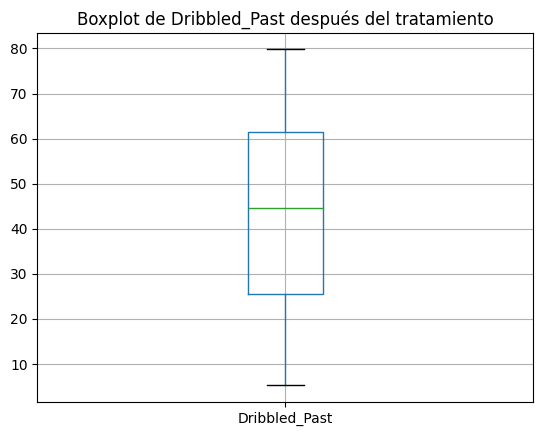

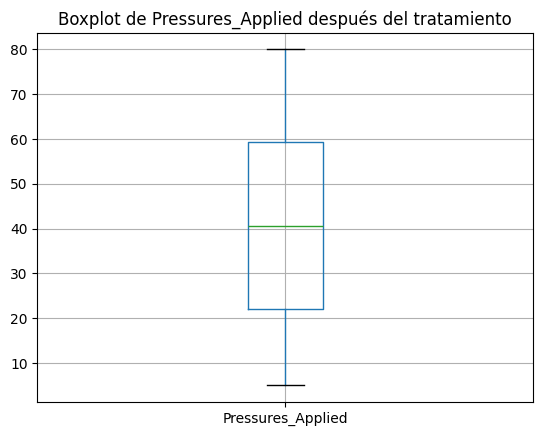

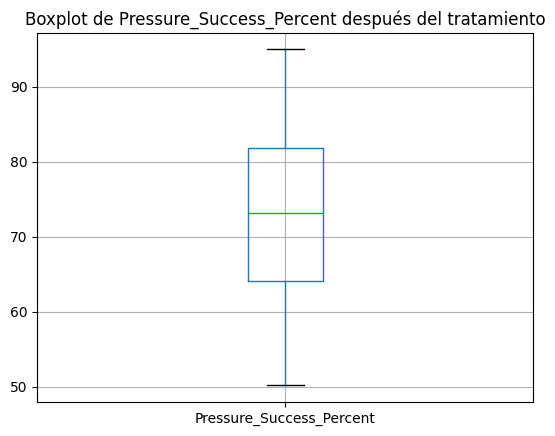

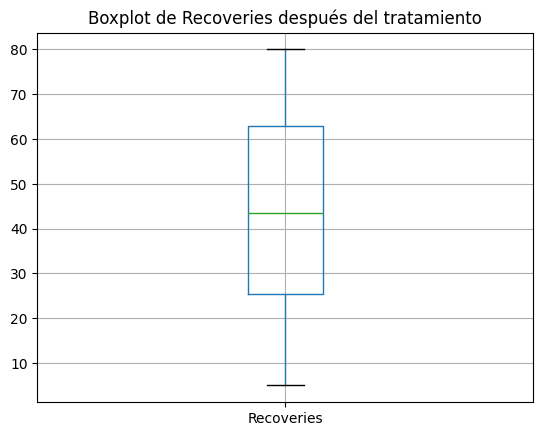

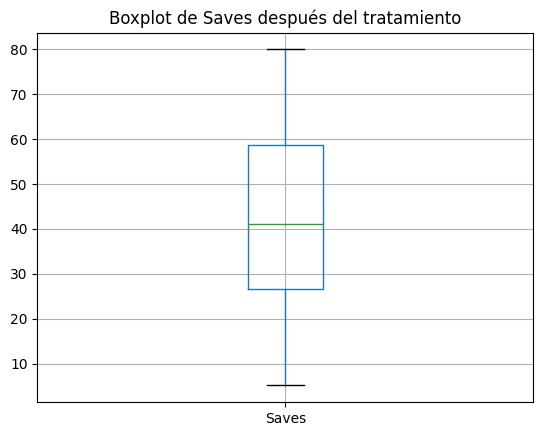

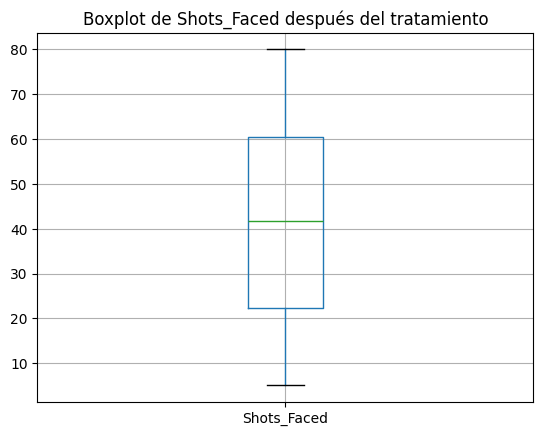

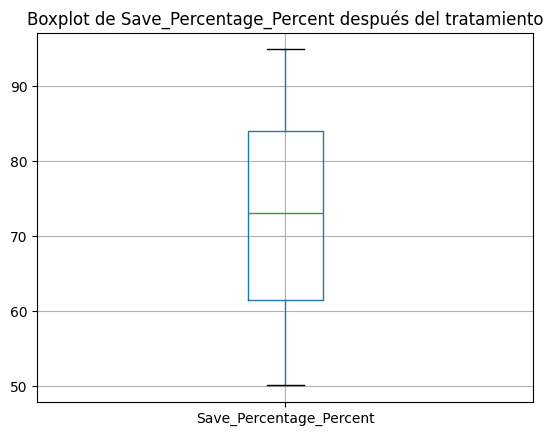

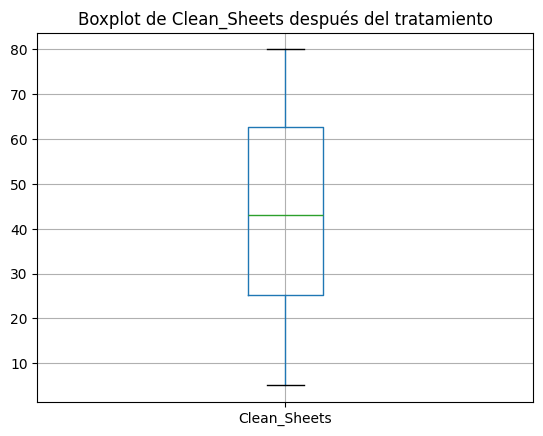

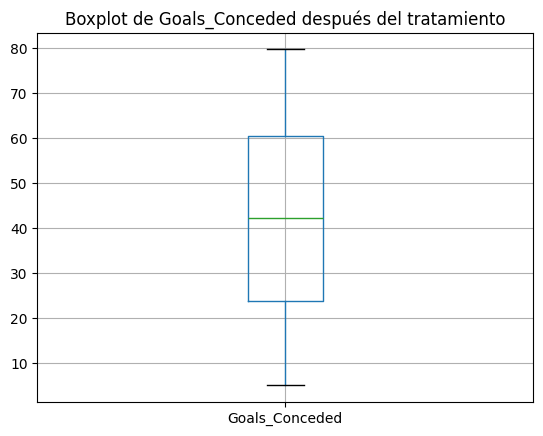

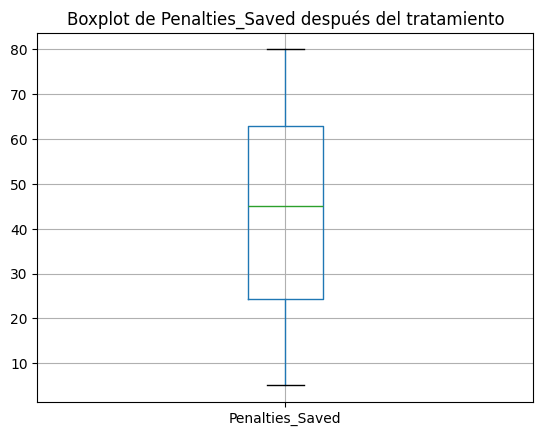

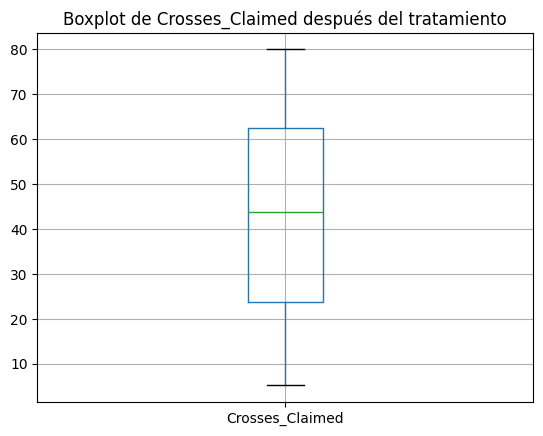

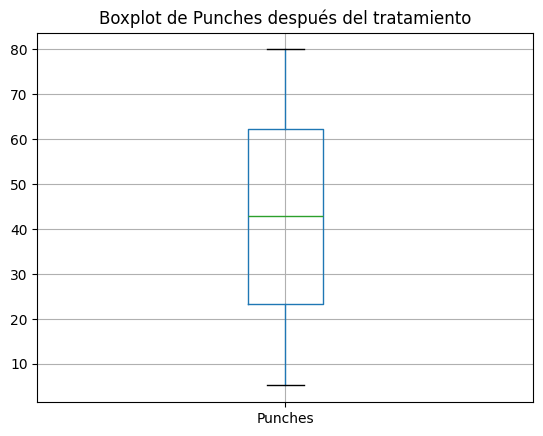

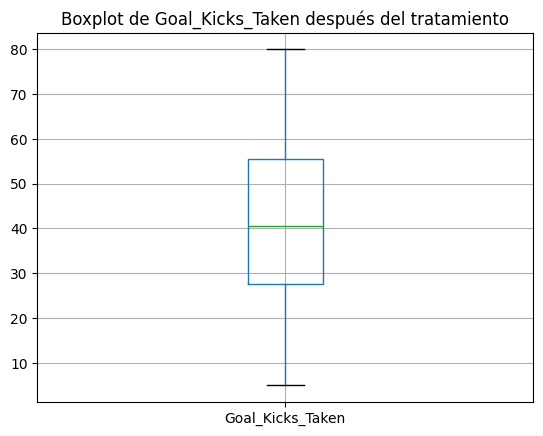

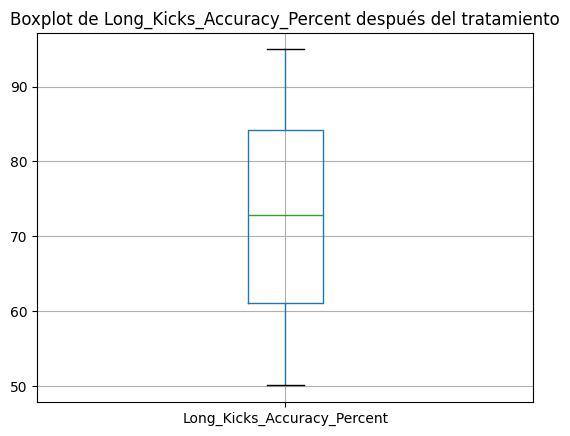

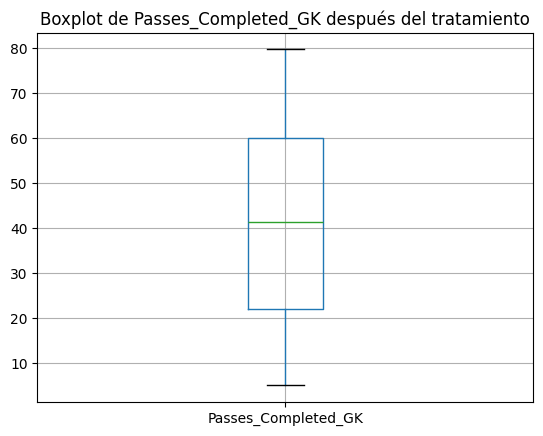

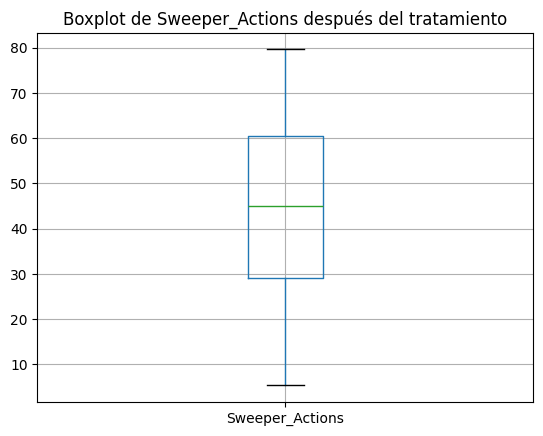

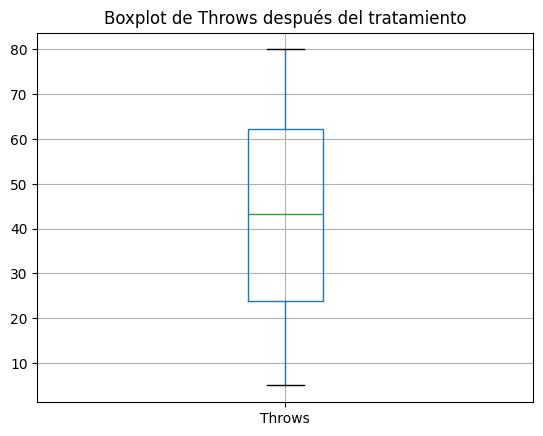

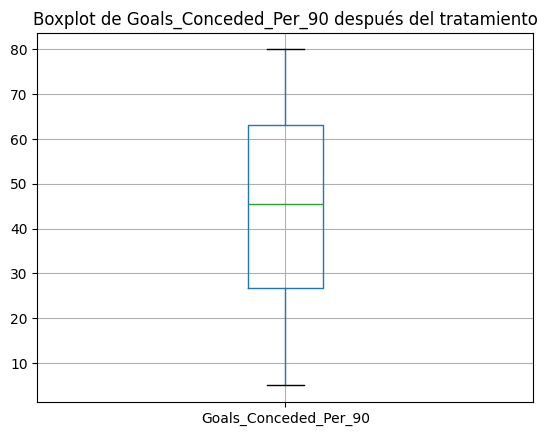

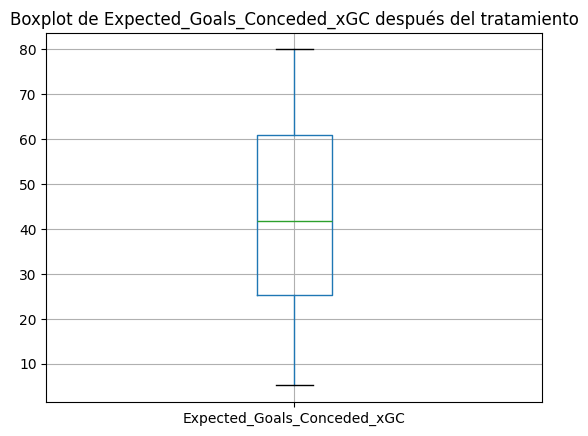

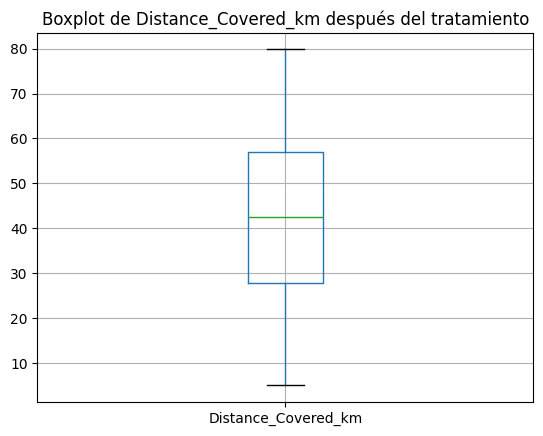

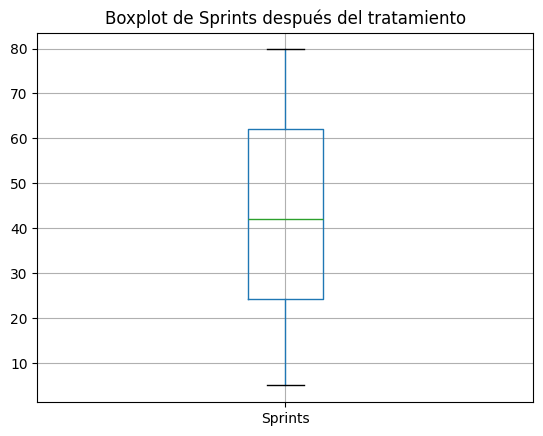

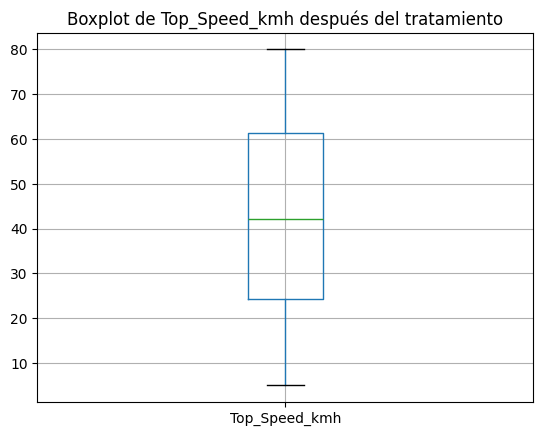

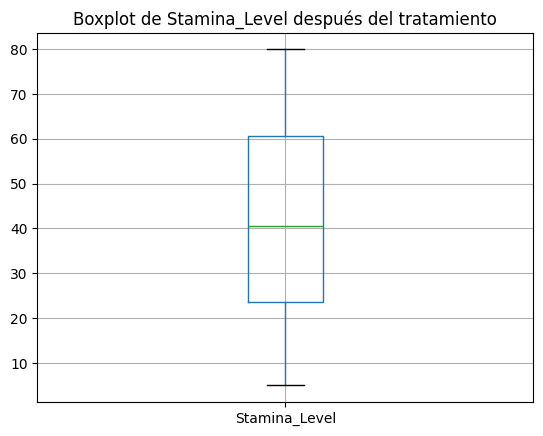

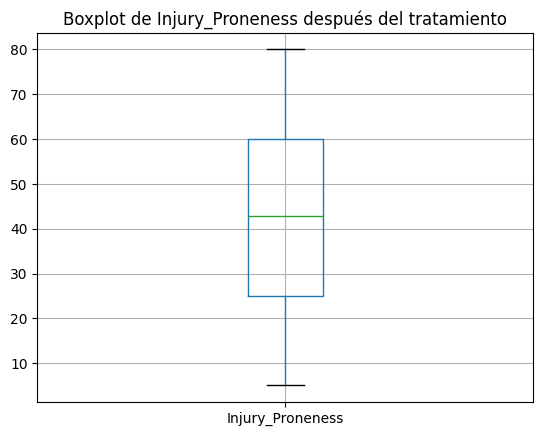

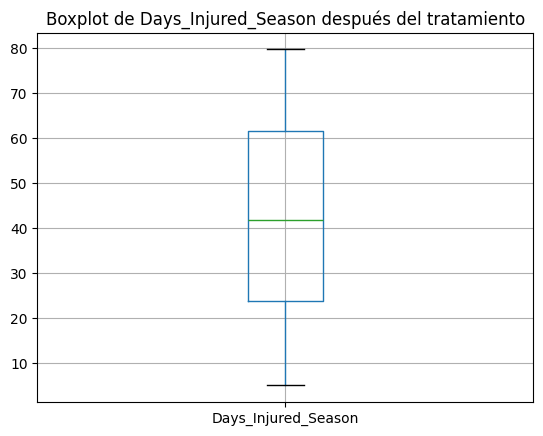

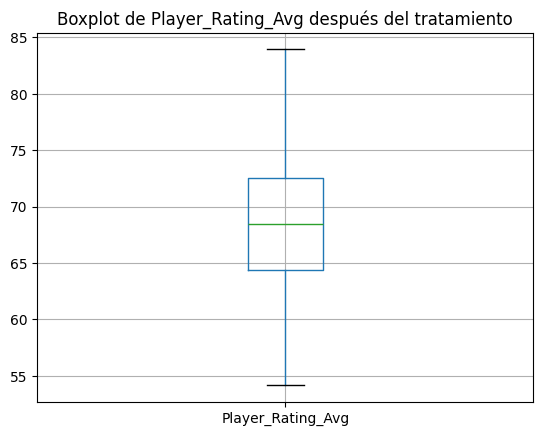

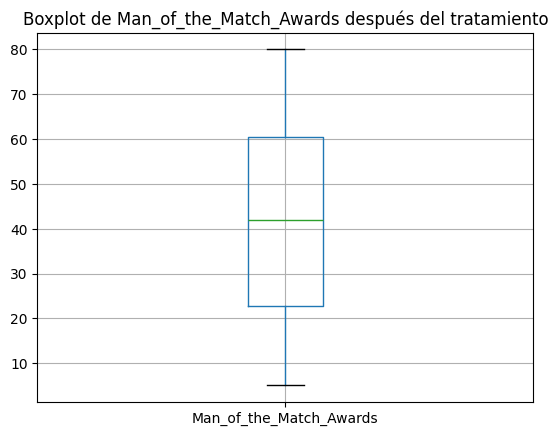

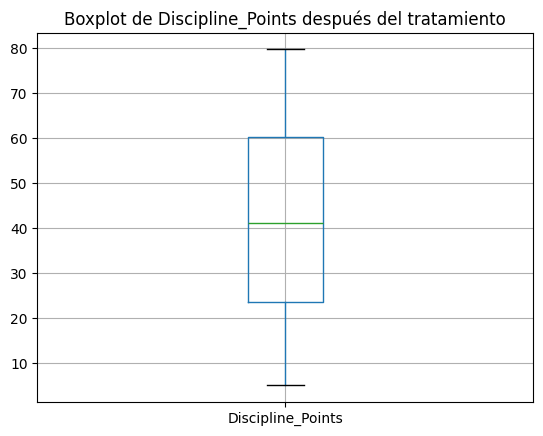

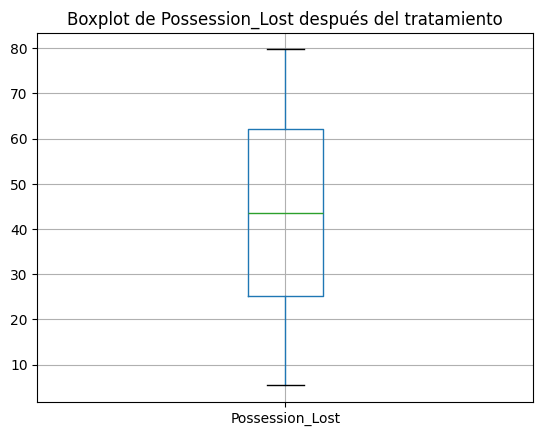

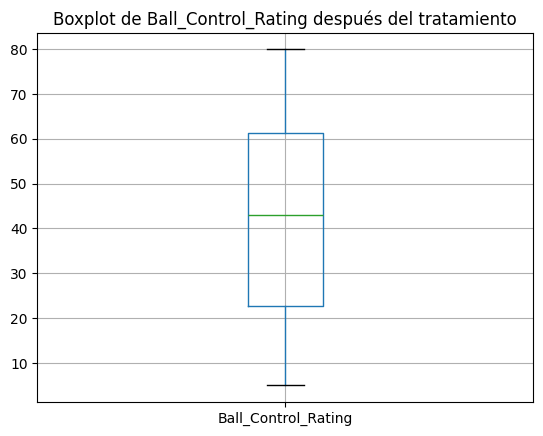

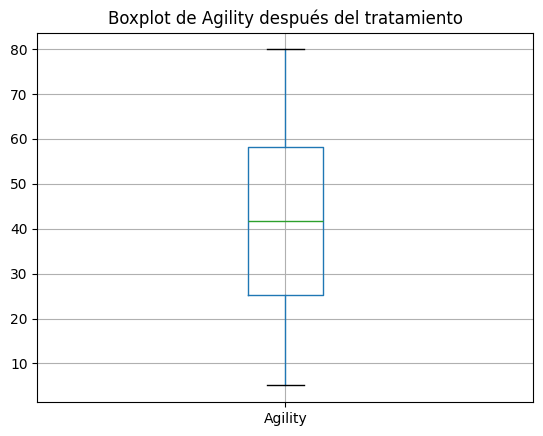

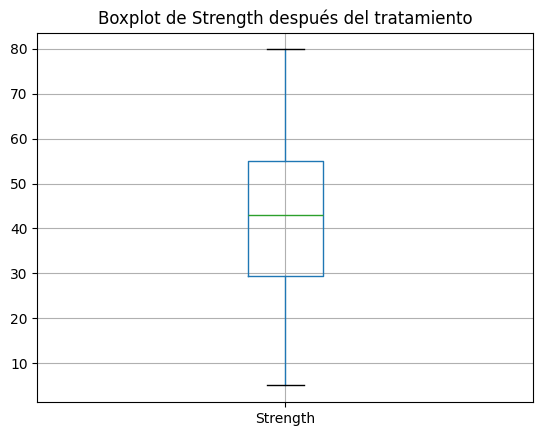

In [17]:
print("Graficos boxplots después del tratamiento")
numColsDespues = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numColsDespues:
    plt.figure()
    dfSinOutliers.boxplot(column=col)
    plt.title(f'Boxplot de {col} después del tratamiento')
    plt.show()

In [18]:
def iqr_outliers(df, columna):
  q1,q3 = np.percentile(df[columna],[25,75])
  iqr = q3 - q1
  limiteInferior = q1 - 1.5 * iqr
  limiteSuperior = q3 + 1.5 * iqr
  return limiteInferior, limiteSuperior

In [19]:
numCols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numCols:
  limiteInferior, limiteSuperior = iqr_outliers(df, col)
  print(f"Limites de {col}: Inferior = {limiteInferior} y Superior = {limiteSuperior}")

Limites de Age: Inferior = 14.5 y Superior = 42.5
Limites de Height_cm: Inferior = 142.5 y Superior = 226.5
Limites de Weight_kg: Inferior = 41.5 y Superior = 117.5
Limites de Matches_Played: Inferior = -15.741770597931012 y Superior = 98.92375798513737
Limites de Minutes_Played: Inferior = -31.840745080608972 y Superior = 117.949713014065
Limites de Trophies_Won: Inferior = -28.767106429037987 y Superior = 115.81729339481183
Limites de Market_Value_Euros: Inferior = -13579849.33547901 y Superior = 43735071.17351636
Limites de Weekly_Wage_Euros: Inferior = -29.305596372262755 y Superior = 116.22062109742146
Limites de Goals: Inferior = -5.590447360288969 y Superior = 21.93349566707809
Limites de Assists: Inferior = -2.6316777065575803 y Superior = 9.111902315567384
Limites de Shots: Inferior = -13.778680698872023 y Superior = 96.95677785465952
Limites de Shots_On_Target: Inferior = -31.654942952445815 y Superior = 119.25949246204613
Limites de Shot_Accuracy_Percent: Inferior = 26.89234

In [20]:
print(df.shape)
print(dfSinOutliers.shape)

(1000, 100)
(969, 100)


# Análisis exploratorio de datos (EDA)

In [21]:
df.columns

Index(['Player_ID', 'Name', 'Team', 'Position', 'Age', 'Height_cm',
       'Weight_kg', 'Matches_Played', 'Minutes_Played', 'Trophies_Won',
       'Market_Value_Euros', 'Weekly_Wage_Euros', 'Goals', 'Assists', 'Shots',
       'Shots_On_Target', 'Shot_Accuracy_Percent', 'Dribbles_Completed',
       'Fouls_Won', 'Offsides', 'Penalties_Scored', 'Penalties_Missed',
       'Expected_Goals_xG', 'Expected_Assists_xA', 'Non_Penalty_Goals',
       'Crosses_Completed', 'Crosses_Attempted', 'Big_Chances_Created',
       'Big_Chances_Missed', 'Touches_in_Box', 'Headed_Goals', 'Goals_Per_90',
       'Passes_Completed', 'Passes_Attempted', 'Pass_Accuracy_Percent',
       'Key_Passes', 'Long_Balls_Completed', 'Long_Balls_Attempted',
       'Through_Balls', 'Passes_into_Final_Third', 'Progressive_Passes',
       'Short_Pass_Accuracy_Percent', 'Medium_Pass_Accuracy_Percent',
       'Long_Pass_Accuracy_Percent', 'Passes_Received', 'Passes_Per_90',
       'Forward_Passes', 'Backward_Passes', 'Sideways_Pa

1. Genera histogramas de variables numéricas relevantes.


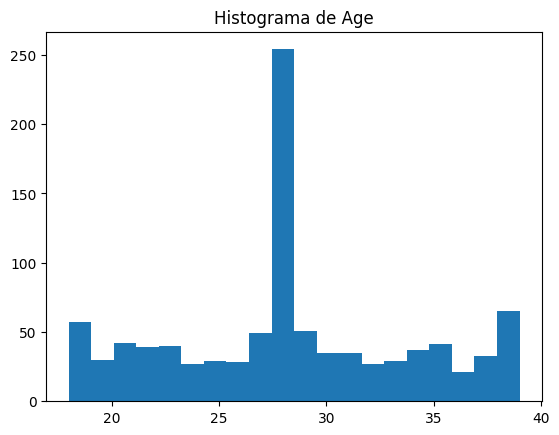

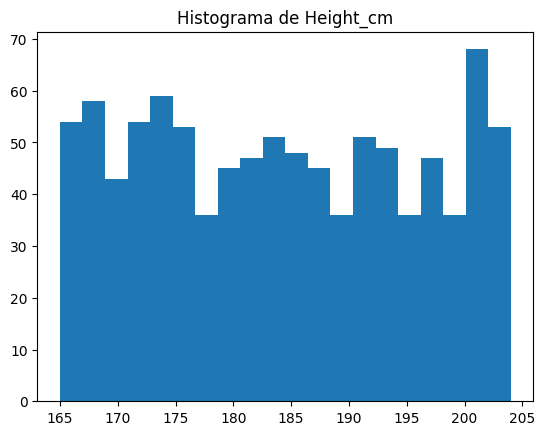

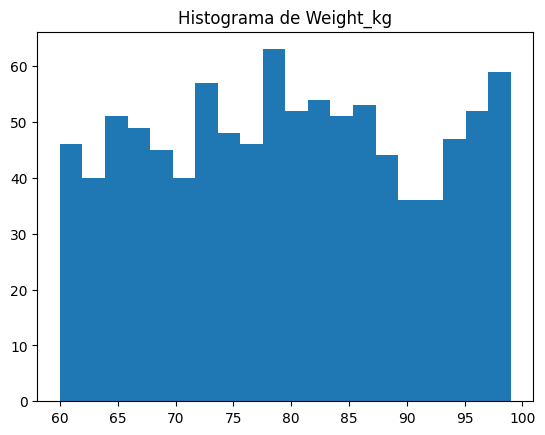

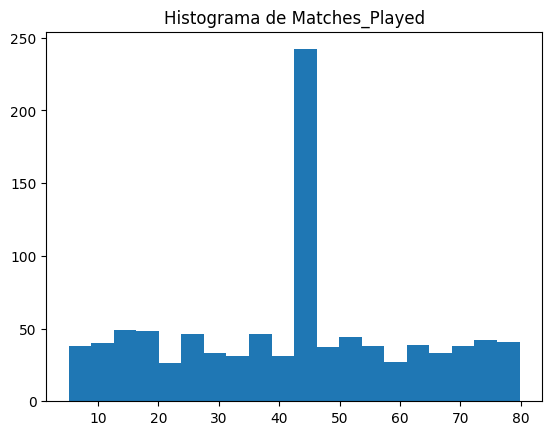

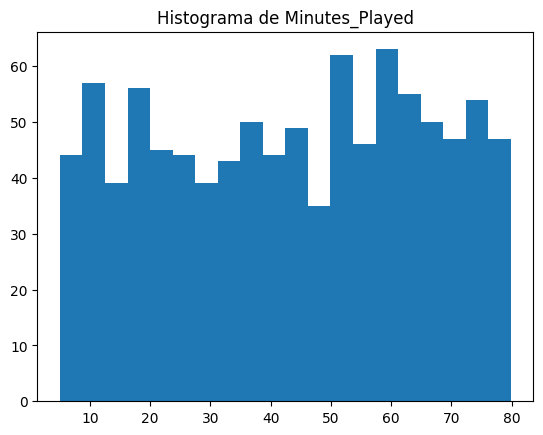

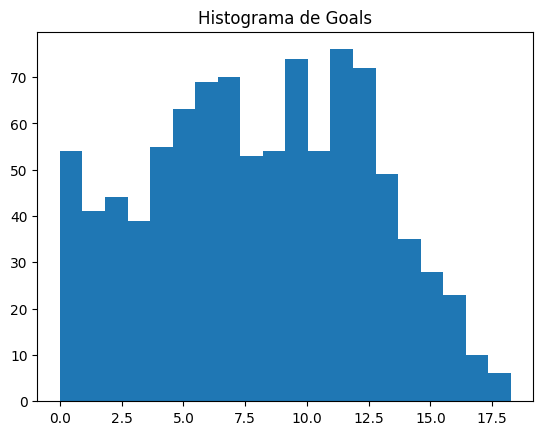

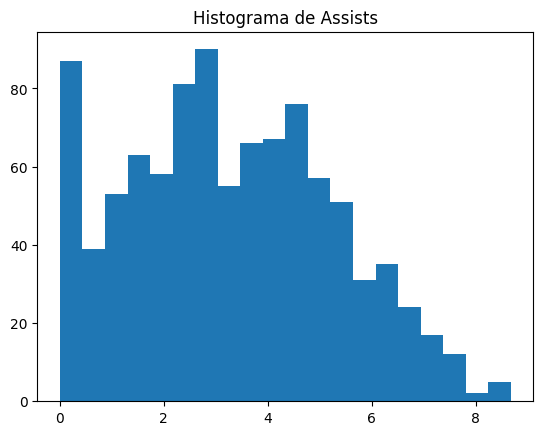

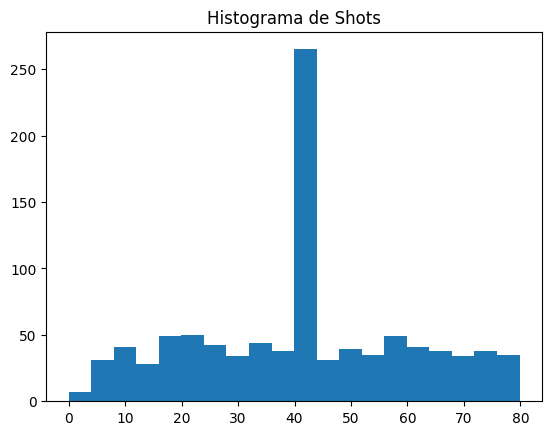

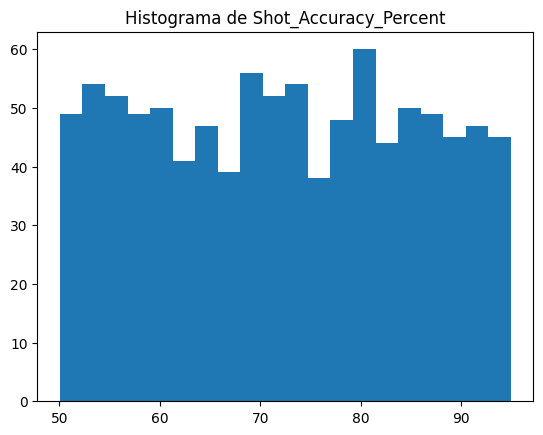

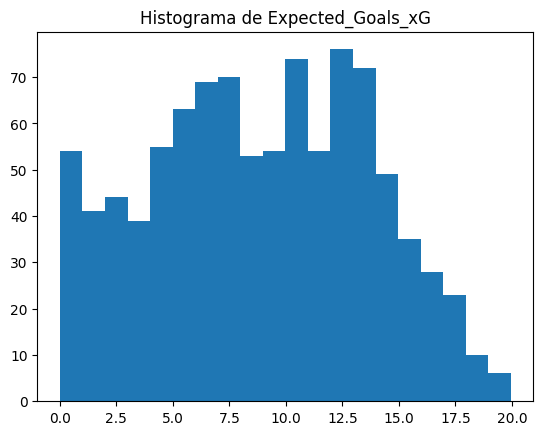

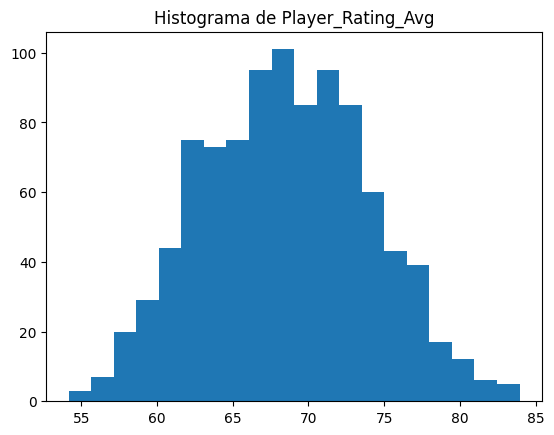

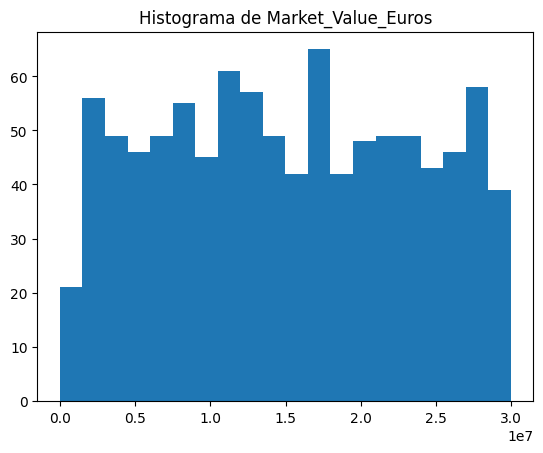

In [22]:
variablesRelevantes = ['Age', 'Height_cm', 'Weight_kg',
    'Matches_Played', 'Minutes_Played', 'Goals', 'Assists',
    'Shots', 'Shot_Accuracy_Percent', 'Expected_Goals_xG',
    'Player_Rating_Avg', 'Market_Value_Euros']

for col in variablesRelevantes:
    plt.figure()
    plt.hist(dfSinOutliers[col], bins = 20)
    plt.title(f'Histograma de {col}')
    plt.show()

2. Crea gráficos de dispersión para identificar correlaciones.


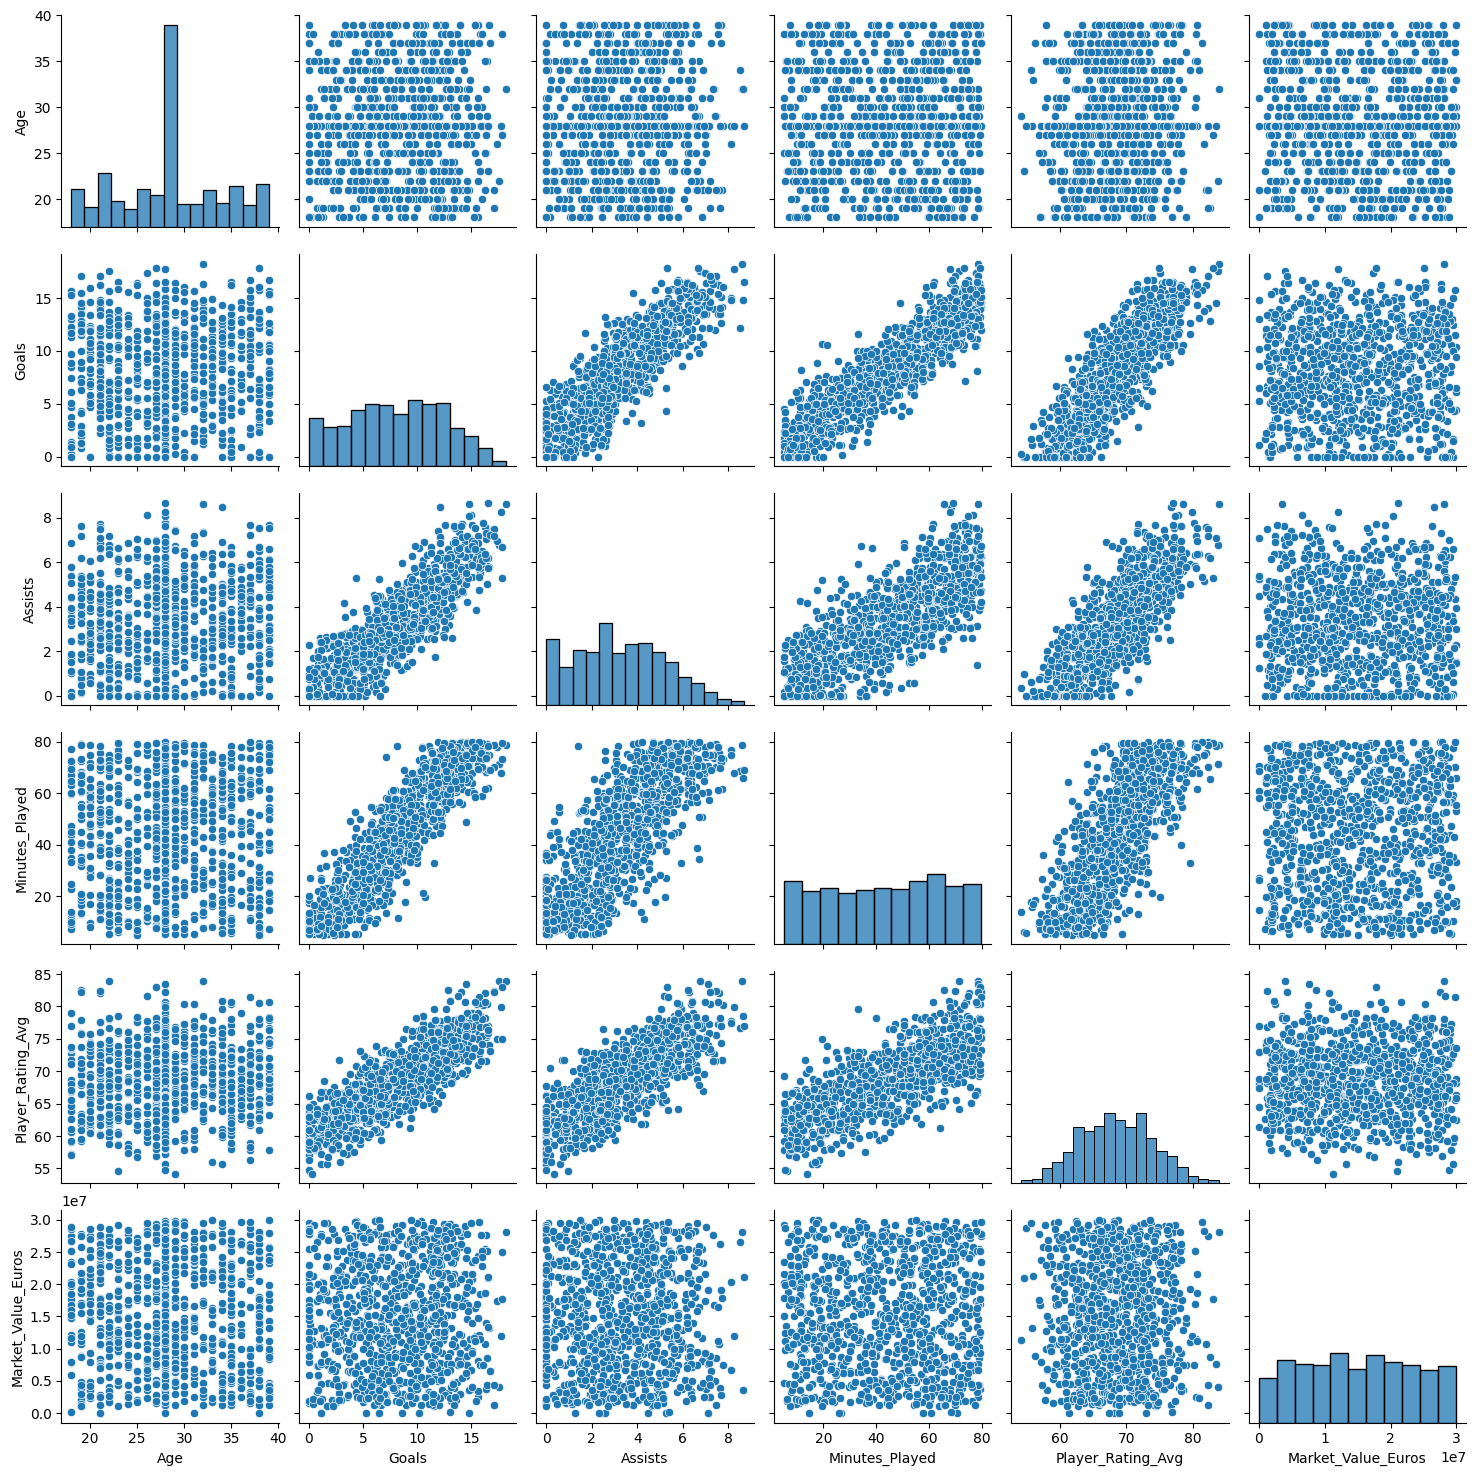

In [23]:
#Esto lo hice con mi amigo ChatGPT, ya que, no entendí como hacerlo.

import seaborn as sns

sns.pairplot(dfSinOutliers[[
    'Age', 'Goals', 'Assists', 'Minutes_Played', 'Player_Rating_Avg', 'Market_Value_Euros'
]])
plt.show()

3. Calcula estadísticos descriptivos con `df.describe()` e interpreta sus resultados.


In [24]:
dfSinOutliers[variablesRelevantes].describe().T

count          mean           std           min  \
Age                    969.0  2.833643e+01  5.419235e+00  1.800000e+01   
Height_cm              969.0  1.842085e+02  1.188781e+01  1.650000e+02   
Weight_kg              969.0  7.964293e+01  1.143380e+01  6.000000e+01   
Matches_Played         969.0  4.228073e+01  1.952233e+01  5.124739e+00   
Minutes_Played         969.0  4.330325e+01  2.179546e+01  5.010652e+00   
Goals                  969.0  8.086926e+00  4.399188e+00  0.000000e+00   
Assists                969.0  3.285891e+00  1.986820e+00  0.000000e+00   
Shots                  969.0  4.128702e+01  1.906918e+01  5.002935e-07   
Shot_Accuracy_Percent  969.0  7.227716e+01  1.297783e+01  5.003919e+01   
Expected_Goals_xG      969.0  8.842115e+00  4.810001e+00  0.000000e+00   
Player_Rating_Avg      969.0  6.853333e+01  5.520229e+00  5.416174e+01   
Market_Value_Euros     969.0  1.509992e+07  8.319436e+06  1.012391e-01   

                                25%           50%           75%           max  
Age                    2.500000e+01  2.800000e+01  3.200000e+01  3.900000e+01  
Height_cm              1.740000e+02  1.840000e+02  1.940000e+02  2.040000e+02  
Weight_kg              7.000000e+01  7.900000e+01  8.900000e+01  9.900000e+01  
Matches_Played         2.699882e+01  4.316011e+01  5.532336e+01  7.982082e+01  
Minutes_Played         2.375219e+01  4.431672e+01  6.172498e+01  7.987917e+01  
Goals                  4.685784e+00  8.135642e+00  1.158262e+01  1.825078e+01  
Assists                1.743533e+00  3.101434e+00  4.717488e+00  8.677664e+00  
Shots                  2.747941e+01  4.140016e+01  5.521303e+01  7.984589e+01  
Shot_Accuracy_Percent  6.063889e+01  7.216126e+01  8.348228e+01  9.497824e+01  
Expected_Goals_xG      5.123360e+00  8.895380e+00  1.266425e+01  1.995511e+01  
Player_Rating_Avg      6.435238e+01  6.843345e+01  7.251084e+01  8.393665e+01  
Market_Value_Euros     7.932599e+06  1.485805e+07  2.214736e+07  2.996308e+07

4. Ejercicio: agrega un gráfico de correlación simple con `df.corr()`.


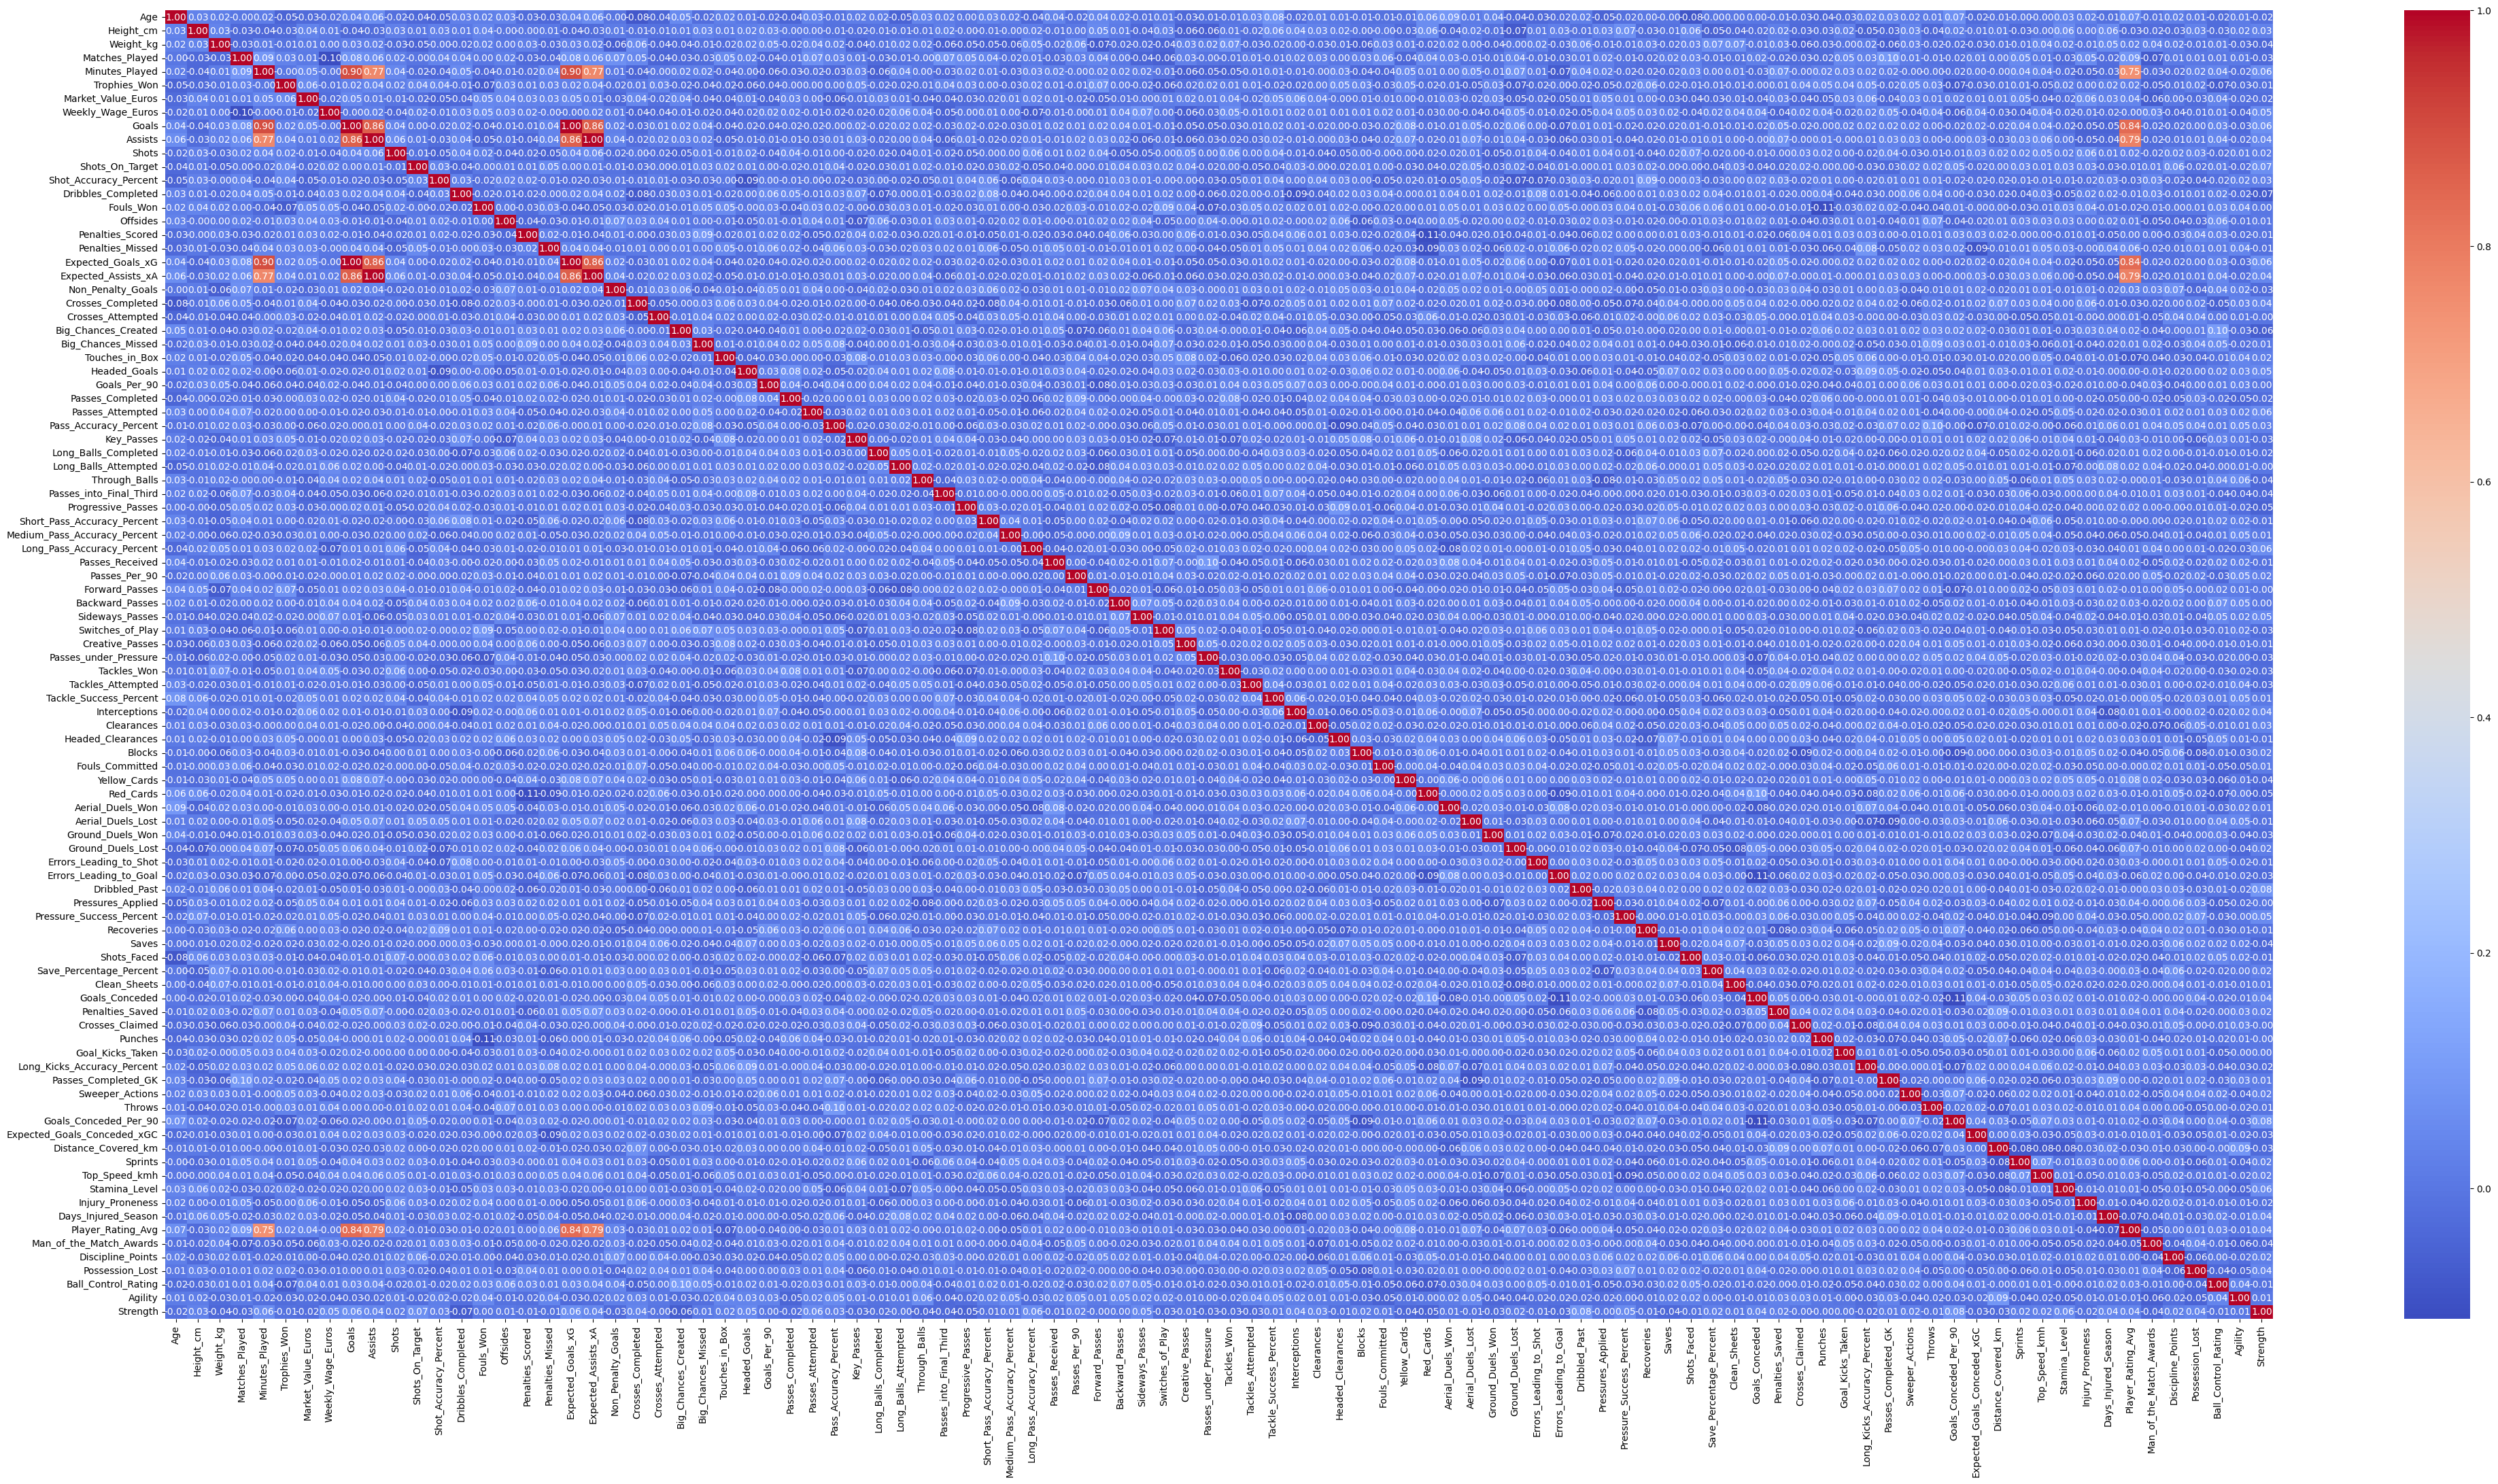

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

colsNum = df.select_dtypes(include="number").columns.tolist()

corr = df[colsNum].corr()
plt.figure(figsize=(50,25))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

colsNum = df.select_dtypes(include="number").columns.tolist()

corr = df[colsNum].corr()
print(corr)

                          Age  Height_cm  Weight_kg  Matches_Played  \
Age                  1.000000   0.028709   0.023172       -0.001847   
Height_cm            0.028709   1.000000   0.034270       -0.034918   
Weight_kg            0.023172   0.034270   1.000000       -0.034648   
Matches_Played      -0.001847  -0.034918  -0.034648        1.000000   
Minutes_Played       0.015839  -0.040496   0.013908        0.091511   
...                       ...        ...        ...             ...   
Discipline_Points    0.021798  -0.031118   0.017446        0.010105   
Possession_Lost      0.005236   0.030467  -0.010747        0.006182   
Ball_Control_Rating -0.024717  -0.025296   0.013110        0.005376   
Agility              0.012470   0.017972  -0.025179        0.007738   
Strength            -0.015967   0.029120  -0.040838       -0.029705   

                     Minutes_Played  Trophies_Won  Market_Value_Euros  \
Age                        0.015839     -0.048742           -0.032560   
H